In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
mpl.rcParams['figure.dpi']= 300

In [16]:
base_swflow= pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_mullFlow_2017toMay_5m_utc_gpm.csv',
                         index_col = 0, names=['time_utc', 'flow'])
base_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_mullSWT_2017toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_mullRWT_2017toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_OAT_2017toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_solarGlob = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/csl_solarGlob_2017toMay_5m_utc_wpm2.csv',
                         index_col = 0, names=['time_utc', 'solarRad'])
base_iatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_IAT_2017FebtoMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_wsRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/iw_WS_2017FebtoMay_5m_utc_mph.csv',
                         index_col = 0, names=['time_utc', 'ws'])



rl_swflow= pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_mullFlow_2018Feb6toMay_5m_utc_gpm.csv',
                         index_col = 0, names=['time_utc', 'flow'])
rl_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_mullSWT_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_mullRWT_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/csl_OAT_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_solarGlob = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/csl_solarGlob_2018Feb6toMay_5m_utc_wpm2.csv',
                         index_col = 0, names=['time_utc', 'solarRad'])
rl_iatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_iat_2018Feb6toMay_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
rl_wsRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2018Data/iw_WS_2018Feb6toMay_5m_utc_mph.csv',
                         index_col = 0, names=['time_utc', 'ws'])

base_1617_swflow= pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_mullFlow_201617Heating_5m_utc_gpm.csv',
                         index_col = 0, names=['time_utc', 'flow'])
base_1617_swSWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_mullSWT_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_swRWT = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_mullRWT_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iwcslCmbd_oat_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_solarGlob = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/csl_solarGlob_201617Heating_5m_utc_wpm2.csv',
                         index_col = 0, names=['time_utc', 'solarRad'])
base_1617_iatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_iat_201617Heating_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])
base_1617_wsRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2016-17HeatingData/iw_ws_201617Heating_5m_utc_mph.csv',
                         index_col = 0, names=['time_utc', 'ws'])

base_2017_oatRaw = pd.read_csv('/home/zhiangz/Dropbox/phd_bpd/iw_control_prj/iw_manual_cali/iw_op_data/2017Data/csliwCmbd_OAT_2017to2018Jan_5m_utc_f.csv',
                         index_col = 0, names=['time_utc', 'temp'])

dp = pd.DataFrame()

In [17]:
base_1617_oatRaw

,temp
time_utc,
2016-11-01T04:05:00Z,43.200000
2016-11-01T04:10:00Z,42.733345
2016-11-01T04:15:00Z,42.883320
2016-11-01T04:20:00Z,42.716682
2016-11-01T04:25:00Z,43.000000
2016-11-01T04:30:00Z,42.849920
2016-11-01T04:35:00Z,42.383278
2016-11-01T04:40:00Z,42.116680
2016-11-01T04:45:00Z,42.316708


In [18]:
def getHeatingEnergy(swflow, swt, rwt, min_int = 1):
    htEnergyDf = pd.DataFrame();
    htEnergyDf['energy'] = 4.187 * swflow['flow'] * 0.06309020 * ((swt['temp'] - 32)/1.8 - (rwt['temp']-32)/1.8) * (min_int/60.0)
    htEnergyDf[htEnergyDf < 0] = 0
    timeIdx = pd.to_datetime(htEnergyDf.index).tz_localize('utc').tz_convert('US/Eastern')
    htEnergyDf.set_index(timeIdx, inplace = True)
    return htEnergyDf;

def getOAT(oatRaw):
    oat = pd.DataFrame();
    oat['temp'] = (oatRaw['temp'] - 32.0)/1.8
    timeIdx = pd.to_datetime(oat.index).tz_localize('utc').tz_convert('US/Eastern')
    oat.set_index(timeIdx, inplace = True)
    return oat;

def getWS(wsRaw):
    ws = pd.DataFrame();
    ws['ws'] = wsRaw['ws'] * 0.44704
    timeIdx = pd.to_datetime(ws.index).tz_localize('utc').tz_convert('US/Eastern')
    ws.set_index(timeIdx, inplace = True)
    return ws;

def getSolarGlob(solarGlobRaw):
    solarGlob = pd.DataFrame();
    solarGlob['solarRad'] = solarGlobRaw['solarRad']
    timeIdx = pd.to_datetime(solarGlob.index).tz_localize('utc').tz_convert('US/Eastern')
    solarGlob.set_index(timeIdx, inplace = True)
    return solarGlob;
    

In [19]:
base_energy = getHeatingEnergy(base_swflow, base_swSWT, base_swRWT, 5)
rl_energy = getHeatingEnergy(rl_swflow, rl_swSWT, rl_swRWT, 5)
base_oat = getOAT(base_oatRaw)
rl_oat = getOAT(rl_oatRaw)
base_solarGlob = getSolarGlob(base_solarGlob)
rl_solarGlob = getSolarGlob(rl_solarGlob)
base_iat = getOAT(base_iatRaw)
rl_iat = getOAT(rl_iatRaw)
base_ws = getWS(base_wsRaw)
rl_ws = getWS(rl_wsRaw)

base_2017_oat = getOAT(base_2017_oatRaw)

base_1617_energy = getHeatingEnergy(base_1617_swflow, base_1617_swSWT, base_1617_swRWT, 5)
base_1617_oat = getOAT(base_1617_oatRaw)
base_1617_solarGlob = getSolarGlob(base_1617_solarGlob)
base_1617_iat = getOAT(base_1617_iatRaw)
base_1617_ws = getWS(base_1617_wsRaw)



In [20]:
base_1617_all = pd.concat([base_1617_oat, base_1617_solarGlob, base_1617_ws, base_1617_iat, base_1617_energy], axis=1)

In [21]:
base_1617_all_list = [base_1617_oat, base_1617_solarGlob, base_1617_ws, base_1617_iat, base_1617_energy]
base_1617_all_aggList = [];
for i in range(len(base_1617_all_list)):
    aggDf = pd.DataFrame();
    orgDf = base_1617_all_list[i]
    colName = orgDf.columns.values[0]
    if i < len(base_1617_all_list) - 1:
        aggDf[colName] = orgDf[colName].resample('D').mean()
    else:
        aggDf[colName] = orgDf[colName].resample('D').sum()
    base_1617_all_aggList.append(aggDf)


In [225]:
base_1617_all_agg = pd.concat(base_1617_all_aggList, axis=1)
base_1617_all_agg.columns = ['oat', 'solarGlob', 'ws', 'iat', 'energy']
base_1617_all_agg['month'] =  base_1617_all_agg.index.month
base_1617_all_agg['weekday'] =  base_1617_all_agg.index.weekday
base_1617_all_agg['weekdayType'] = base_1617_all_agg.index.weekday
base_1617_all_agg.loc[base_1617_all_agg['weekday'] > 4, 'weekdayType'] = 0
base_1617_all_agg.loc[base_1617_all_agg['weekday'] <= 4, 'weekdayType'] = 1
base_1617_weekday_agg = base_1617_all_agg.loc[(base_1617_all_agg["weekday"] < 7) &
                                            ((base_1617_all_agg["month"] < 5) |
                                            (base_1617_all_agg["month"] > 10)) &
                                             (base_1617_all_agg["energy"] > 40)]
base_1617_total_x = base_1617_weekday_agg[['oat','solarGlob','ws','iat']].as_matrix()
base_1617_total_y = base_1617_weekday_agg[['energy']].as_matrix()


# Get subset for train and test
train_rdm_choice_idx = np.random.choice(base_1617_total_y.shape[0], int(base_1617_total_y.shape[0] * 0.8), replace = False)
base_1617_train_x = base_1617_total_x[train_rdm_choice_idx, :]
base_1617_train_y = base_1617_total_y[train_rdm_choice_idx, :]
base_1617_test_x = np.delete(base_1617_total_x, train_rdm_choice_idx, axis = 0)
base_1617_test_y = np.delete(base_1617_total_y, train_rdm_choice_idx, axis = 0)

# Normalize x y
from sklearn.preprocessing import StandardScaler
std_scaler_x = StandardScaler()
std_scaler_y = StandardScaler()
base_1617_train_x = std_scaler_x.fit_transform(base_1617_train_x)
base_1617_train_y = std_scaler_y.fit_transform(base_1617_train_y)
base_1617_test_x = std_scaler_x.transform(base_1617_test_x)
base_1617_test_y = std_scaler_y.transform(base_1617_test_y)

In [206]:
base_1617_total_x.shape

(357, 3)

In [226]:
# Gaussian training
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, DotProduct, RationalQuadratic, WhiteKernel, Matern, ExpSineSquared

# K fold cv
from sklearn.model_selection import KFold

def get_kfold_res (k, rg, x, y):
    kf = KFold(n_splits=k)
    res_score = 0;
    for train_index, valid_index in kf.split(x):
        X_train, X_valid = x[train_index, :], x[valid_index, :]
        y_train, y_valid = y[train_index, :], y[valid_index, :]
        rg.fit(X_train, y_train)
        res_score += rg.score(X_valid, y_valid);
    return res_score/k



gp_kernel_mtd = RationalQuadratic
gp_kernel = gp_kernel_mtd(0.1, 0.5)
rg = GaussianProcessRegressor(kernel=gp_kernel, alpha=1e-10, normalize_y=True, n_restarts_optimizer = 10)
#rg = BayesianRidge()
#rg = MLPRegressor()
rg.fit(base_1617_train_x, base_1617_train_y)
#for train_index, test_index in kf.split(base_1617_train_x):
#    print (train_index, test_index)
y_pred, y_pred_std = rg.predict(base_1617_test_x, return_std=True)
y_pred = np.ravel(y_pred)
print (rg.score(base_1617_test_x, base_1617_test_y))

0.8423718805523411


In [137]:
rg.score(std_scaler_x.transform(base_1617_total_x[-60:-30, :]), std_scaler_y.transform(base_1617_total_y[-60:-30, :]))

0.9922649841185711

In [11]:
# Feature selection
import itertools
fea_index = [0, 1, 2, 3, 4] # 'oat','solarGlob', 'ws', 'iat', 'weekdayType'
feaSelec_foldK = 10
feaSelec_res = []
for feature_num in range(1, len(fea_index)):
    for feature_idx_choice in itertools.combinations(fea_index, feature_num):
        feaSelec_trainX_this = base_1617_train_x[:, list(feature_idx_choice)];
        res_score = get_kfold_res (feaSelec_foldK, rg, feaSelec_trainX_this, base_1617_train_y);
        print ('fea_index: ', feature_idx_choice)
        print ('kFold_score: ', res_score)
        feaSelec_res.append([feature_idx_choice, res_score])
allFeaRes = get_kfold_res (feaSelec_foldK, rg, base_1617_train_x, base_1617_train_y)
feaSelec_res.append([tuple(fea_index), res_score])

KeyboardInterrupt: 

In [208]:
feaSelec_res

[]

In [40]:
# Model selection
import itertools
l_choices = [0.1, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]
alpha_choices = [0.1, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]
gp_kernel_mtd = RationalQuadratic
modSelec_res = []
modSelec_foldK = 10

for l_choice in l_choices:
    for alpha_choice in alpha_choices:
        gp_kernel = gp_kernel_mtd(l_choice, alpha_choice)
        rg = GaussianProcessRegressor(kernel=gp_kernel, alpha=1e-8, normalize_y=True, n_restarts_optimizer = 10)
        res_score = get_kfold_res (modSelec_foldK, rg, base_1617_train_x, base_1617_train_y);
        print ('l_choice: ', l_choice)
        print ('alpha_choices: ', alpha_choice)
        print ('res_score', res_score)
        modSelec_res.append([(l_choice, alpha_choice), res_score])

KeyboardInterrupt: 

In [207]:
modSelec_res

[]

In [60]:
y_pred_org = std_scaler_y.inverse_transform(y_pred) 
y_pred_org_std = std_scaler_y.inverse_transform(y_pred_std) - std_scaler_y.mean_

In [61]:
y_pred_org_std

array([102.79869345,  91.92209371,  90.9815892 , 105.62991065,
        96.86343697, 105.97950731, 111.81958932,  69.26258843,
        95.33264927, 116.04271277, 107.68964738, 101.67609471,
        95.19344053, 111.28458011,  93.20835077, 108.28312926,
       105.1247601 , 109.03346108,  87.87118212, 112.8013004 ,
        63.59488345, 117.06553422,  88.0335506 , 109.5796357 ,
       103.24561734,  91.19542398,  90.73170589, 100.26124708,
        80.62323727,  96.69170493, 105.42379778, 103.52505387,
       103.17002583, 106.10741149, 108.99117054, 102.88694362,
       116.62145214, 104.66895659,  93.33924376,  90.1572076 ,
        77.39067608, 102.64325813, 103.84074476, 117.29187852,
       130.35531147, 124.33877958, 104.36592653, 108.92051321,
       118.13387955, 118.01081493, 119.40636442, 101.52697609,
       122.05209023, 116.76156312, 109.19235426, 108.07218965,
       100.14781649, 115.16039867, 106.0786758 , 111.83342602,
       106.16298667, 111.36472334, 102.35208915,  66.54

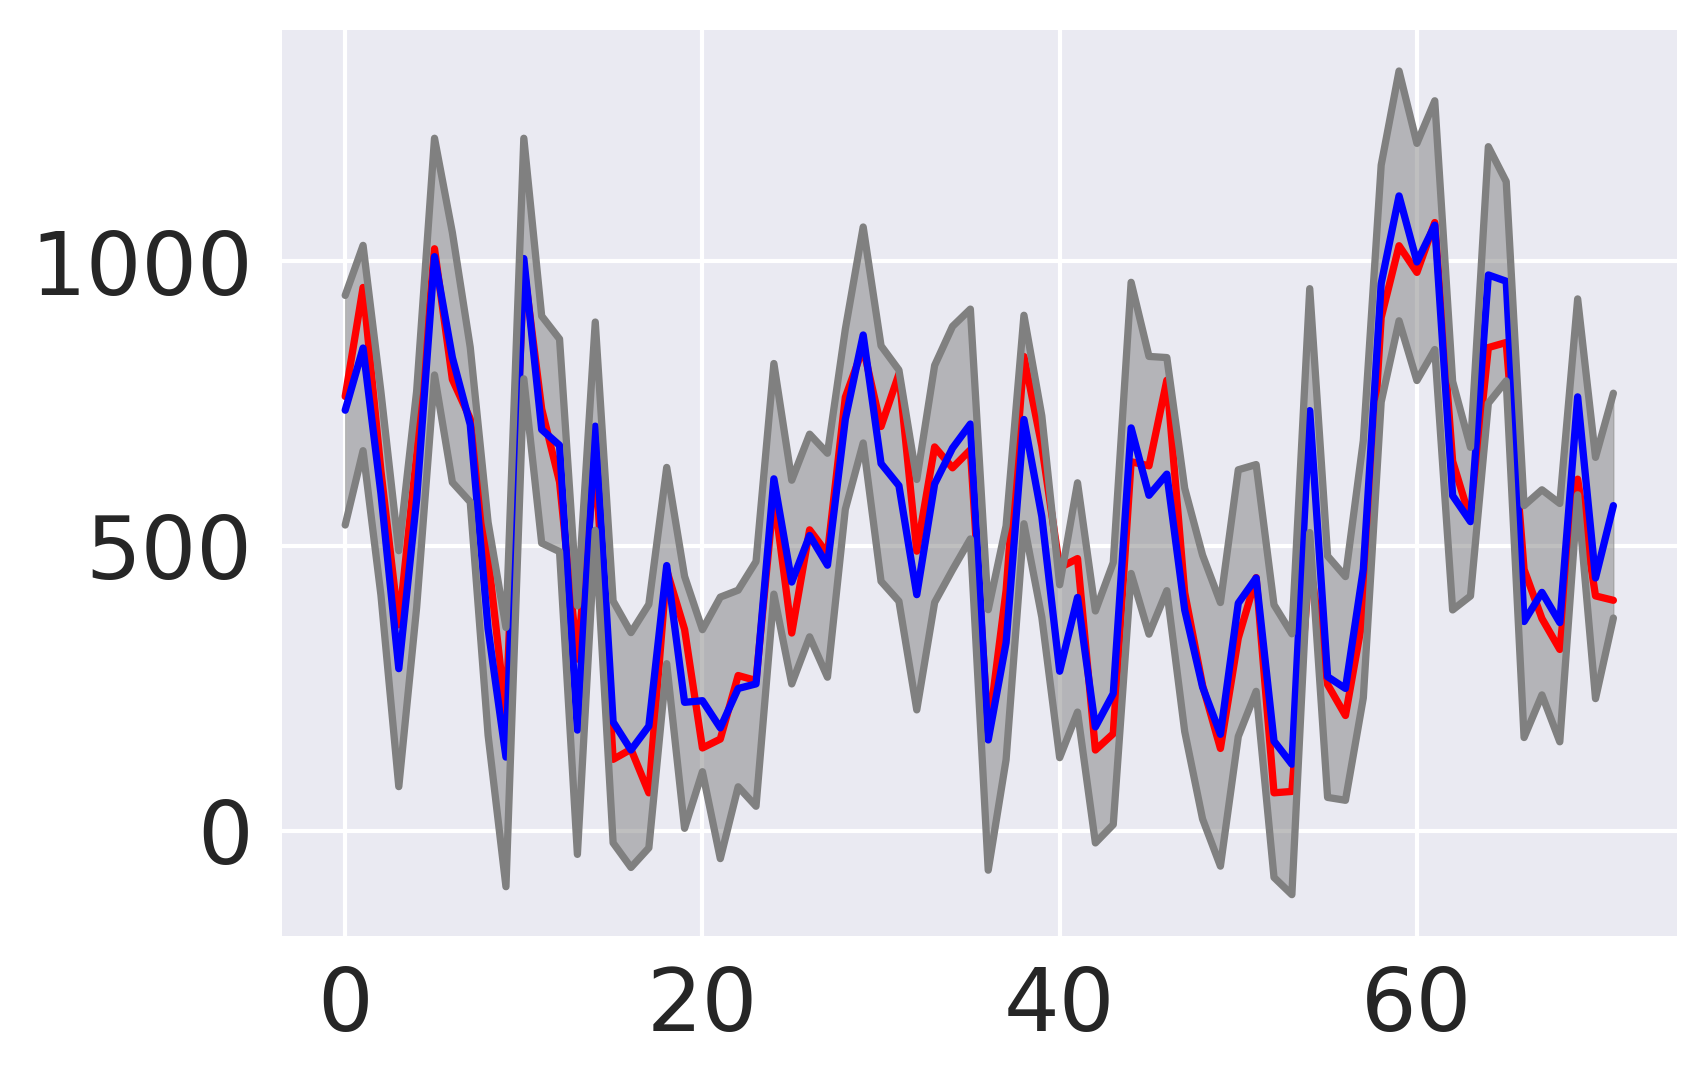

In [62]:
x_plot = np.array(range(72))
plt.plot(x_plot, std_scaler_y.inverse_transform(base_1617_test_y), '-r')
plt.plot(x_plot, y_pred_org, '-b')
plt.plot(x_plot, y_pred_org - 1.9600 * y_pred_org_std, 'grey')
plt.plot(x_plot, y_pred_org + 1.9600 * y_pred_org_std, 'grey')
plt.fill_between(x_plot, y_pred_org - 1.9600 * y_pred_org_std, 
                 y_pred_org + 1.9600 * y_pred_org_std, color='grey', alpha='0.5')


In [63]:
base_energy = base_energy[base_energy.index.month > 1]
base_energy = base_energy[base_energy.index.month < 5]
base_oat = base_oat[base_oat.index.month > 1]
base_oat = base_oat[base_oat.index.month < 5]
base_solarGlob = base_solarGlob[base_solarGlob.index.month > 1]
base_solarGlob = base_solarGlob[base_solarGlob.index.month < 5]

rl_energy = rl_energy[rl_energy.index.month < 5]
rl_oat = rl_oat[rl_oat.index.month < 5]
rl_solarGlob = rl_solarGlob[rl_solarGlob.index.month < 5]
rl_iat = rl_iat[rl_iat.index.month < 5]

In [64]:
# Process rl_energy to account for fail of iw weather station
#for i in range(rl_energy.shape[0]):
#    if rl_oat['c'][i]>10.0 and rl_energy['kwh'][i] > 0.1:
#        rl_energy['kwh'][i] = 0.04
# Daily sum of energy (all)
base_energy_daily_all = pd.DataFrame();
base_energy_daily_all['energy'] = base_energy['energy'].resample('D').sum()
rl_energy_daily_all = pd.DataFrame();
rl_energy_daily_all['energy'] = rl_energy['energy'].resample('D').sum()
# Daily sum of energy (weekdays only)
base_energy_daily_weekdays = base_energy_daily_all[base_energy_daily_all.index.dayofweek < 5]
rl_energy_daily_weekdays = rl_energy_daily_all[rl_energy_daily_all.index.dayofweek < 5]
# Monthly daily average of energy
base_energy_monthly_daily_mean = pd.DataFrame();
base_energy_monthly_daily_mean['energy'] = base_energy_daily_all['energy'].resample('M').mean()
rl_energy_monthly_daily_mean = pd.DataFrame();
rl_energy_monthly_daily_mean['energy'] = rl_energy_daily_all['energy'].resample('M').mean()
# Daily average of oat (all)
base_oat_daily_all = pd.DataFrame();
base_oat_daily_all['temp'] = base_oat['temp'].resample('D').mean()
rl_oat_daily_all = pd.DataFrame();
rl_oat_daily_all['temp'] = rl_oat['temp'].resample('D').mean()

base_2017_oat_daily_all = pd.DataFrame();
base_2017_oat_daily_all['temp'] = base_2017_oat['temp'].resample('D').mean()
# Daily average of oat (weekdays only)
base_oat_daily_weekdays = base_oat_daily_all[base_oat_daily_all.index.dayofweek < 5]
rl_oat_daily_weekdays = rl_oat_daily_all[rl_oat_daily_all.index.dayofweek < 5]
# Monthly average of oat
base_oat_monthly_mean = pd.DataFrame();
base_oat_monthly_mean['temp'] = base_oat['temp'].resample('M').mean()
rl_oat_monthly_mean = pd.DataFrame();
rl_oat_monthly_mean['energy'] = rl_oat['temp'].resample('M').mean()
# Daily average of solar gloab (all)
base_solarGlob_daily_all = pd.DataFrame();
base_solarGlob_daily_all['solarRad'] = base_solarGlob['solarRad'].resample('D').mean()
rl_solarGlob_daily_all = pd.DataFrame();
rl_solarGlob_daily_all['solarRad'] = rl_solarGlob['solarRad'].resample('D').mean()

# Daily average of iat
base_iat_daily_all = pd.DataFrame();
base_iat_daily_all['temp'] = base_iat['temp'].resample('D').mean()
rl_iat_daily_all = pd.DataFrame();
rl_iat_daily_all['temp'] = rl_iat['temp'].resample('D').mean()

# Daily average of ws
base_ws_daily_all = pd.DataFrame();
base_ws_daily_all['ws'] = base_ws['ws'].resample('D').mean()
rl_ws_daily_all = pd.DataFrame();
rl_ws_daily_all['ws'] = rl_ws['ws'].resample('D').mean()

# Base daily average oat of feb 06-23
#base_oat_daily_interval = pd.DataFrame();
#base_oat_daily_interval['c'] = base_oat['c'].resample('D').mean()
#base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.month == 2]
#base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.day >= 6]
#base_oat_daily_interval = base_oat_daily_interval[base_oat_daily_interval.index.day <= 23]
# rl daily average oat of feb 06-23
#rl_oat_daily_all = pd.DataFrame();
#rl_oat_daily_all['c'] = rl_oat['c'].resample('D').mean()


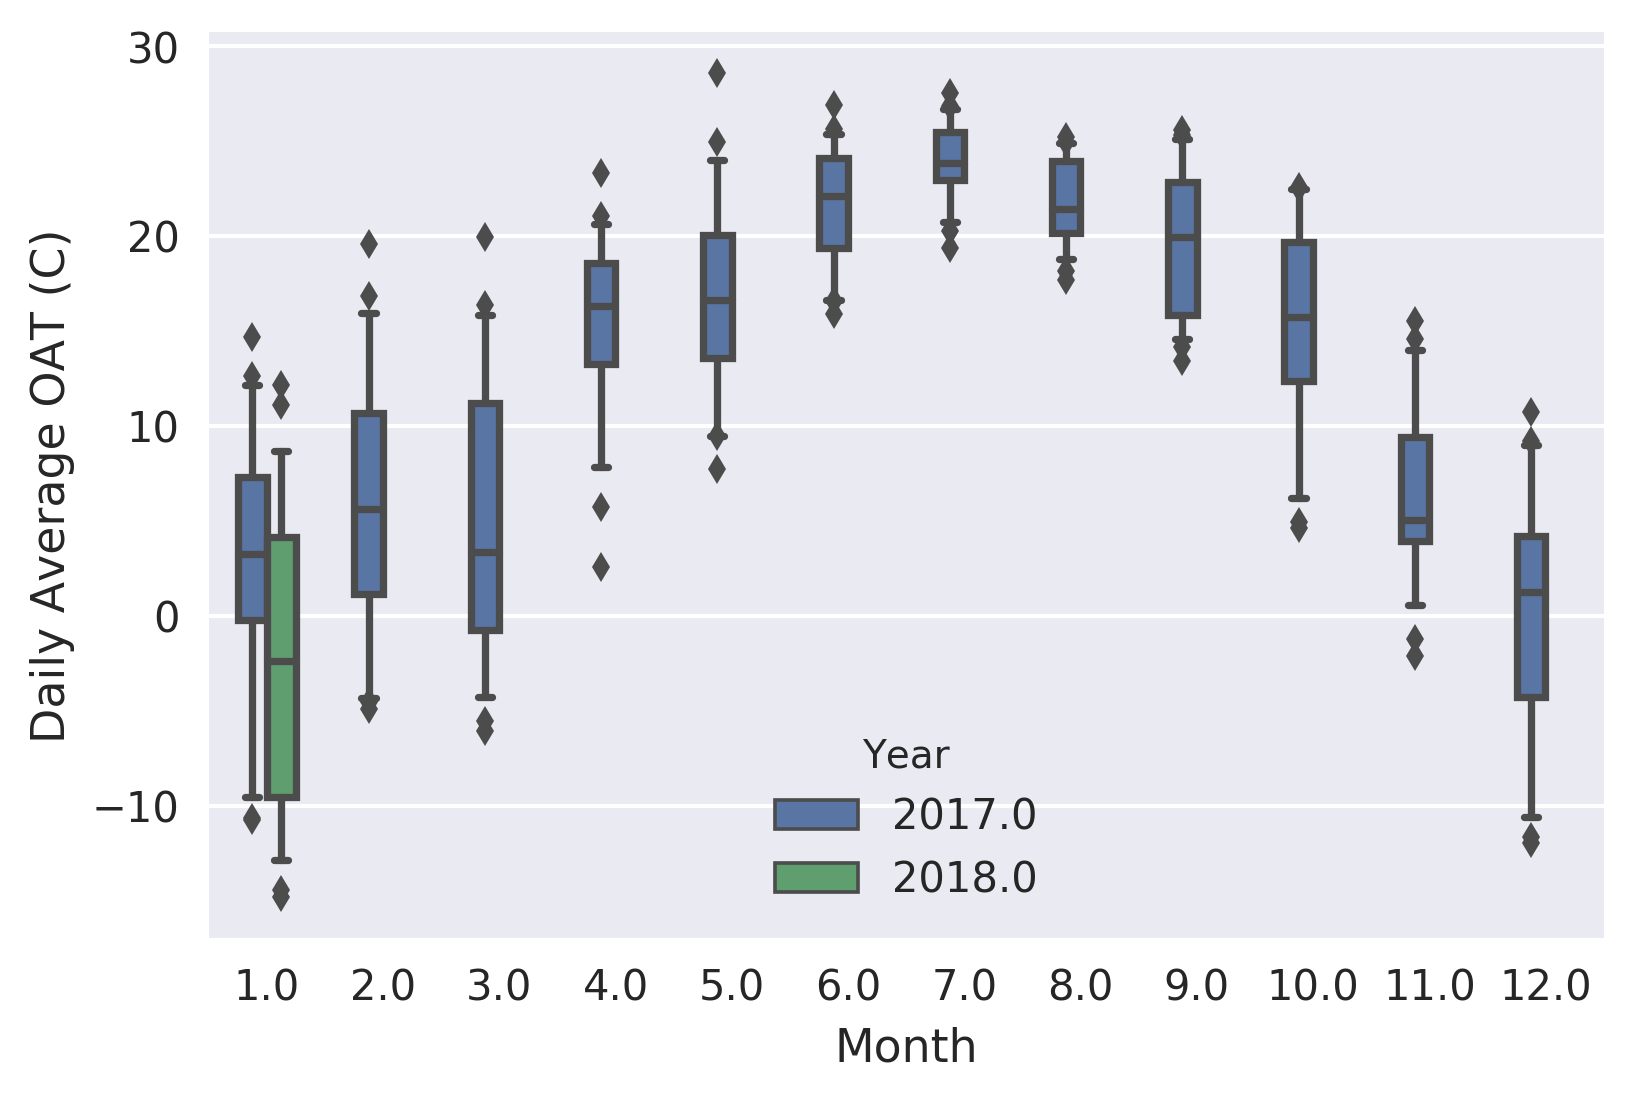

In [65]:
# base and rl oat
base_oat_daily_all_mat = [base_oat_daily_all['temp'].as_matrix(), base_oat_daily_all.index.month.values, 
                          base_oat_daily_all.index.year.values, base_oat_daily_all.index.weekday.values]
rl_oat_daily_all_mat = [rl_oat_daily_all['temp'].as_matrix(), rl_oat_daily_all.index.month.values, 
                        rl_oat_daily_all.index.year.values, rl_oat_daily_all.index.weekday.values]
cmbd_oat_daily_all_mat = [np.concatenate((base_oat_daily_all_mat[0], rl_oat_daily_all_mat[0])), 
                          np.concatenate((base_oat_daily_all_mat[1], rl_oat_daily_all_mat[1])),
                         np.concatenate((base_oat_daily_all_mat[2], rl_oat_daily_all_mat[2])),
                         np.concatenate((base_oat_daily_all_mat[3], rl_oat_daily_all_mat[3]))]
base_2017_oat_daily_all_mat = [base_2017_oat_daily_all['temp'].as_matrix(), base_2017_oat_daily_all.index.month.values, 
                          base_2017_oat_daily_all.index.year.values, base_2017_oat_daily_all.index.weekday.values]

cmbd_oat_daily_all_df = pd.DataFrame(np.array(cmbd_oat_daily_all_mat).T, columns = ['Daily Average OAT (C)', 'Month', 'Year', 'Weekday']);
cmbd_oat_daily_all_df.Month = cmbd_oat_daily_all_df.Month.astype(int)
cmbd_oat_daily_all_df.Year = cmbd_oat_daily_all_df.Year.astype(int)
cmbd_oat_daily_all_df.Weekday = cmbd_oat_daily_all_df.Weekday.astype(int)

cmbd_oat_daily_all_df.loc[cmbd_oat_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_oat_daily_all_df.loc[cmbd_oat_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

base_2017_oat_daily_all_df = pd.DataFrame(np.array(base_2017_oat_daily_all_mat).T, columns = ['Daily Average OAT (C)', 'Month', 'Year', 'Weekday']);

sns.set(font_scale=1)
#sns.violinplot(x = 'Month', y = 'Daily Average OAT (C)', hue = 'Year', data = cmbd_oat_daily_all_df
#            , palette = 'deep', width = 0.5, whis = [5, 95])

sns.boxplot(x = 'Month', y = 'Daily Average OAT (C)', hue = 'Year', data = base_2017_oat_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])


In [66]:

base_2017_oat_sts = base_2017_oat_daily_all_df.groupby(
    [base_2017_oat_daily_all_df.Year, base_2017_oat_daily_all_df.Month]).agg(['mean', 'std'])

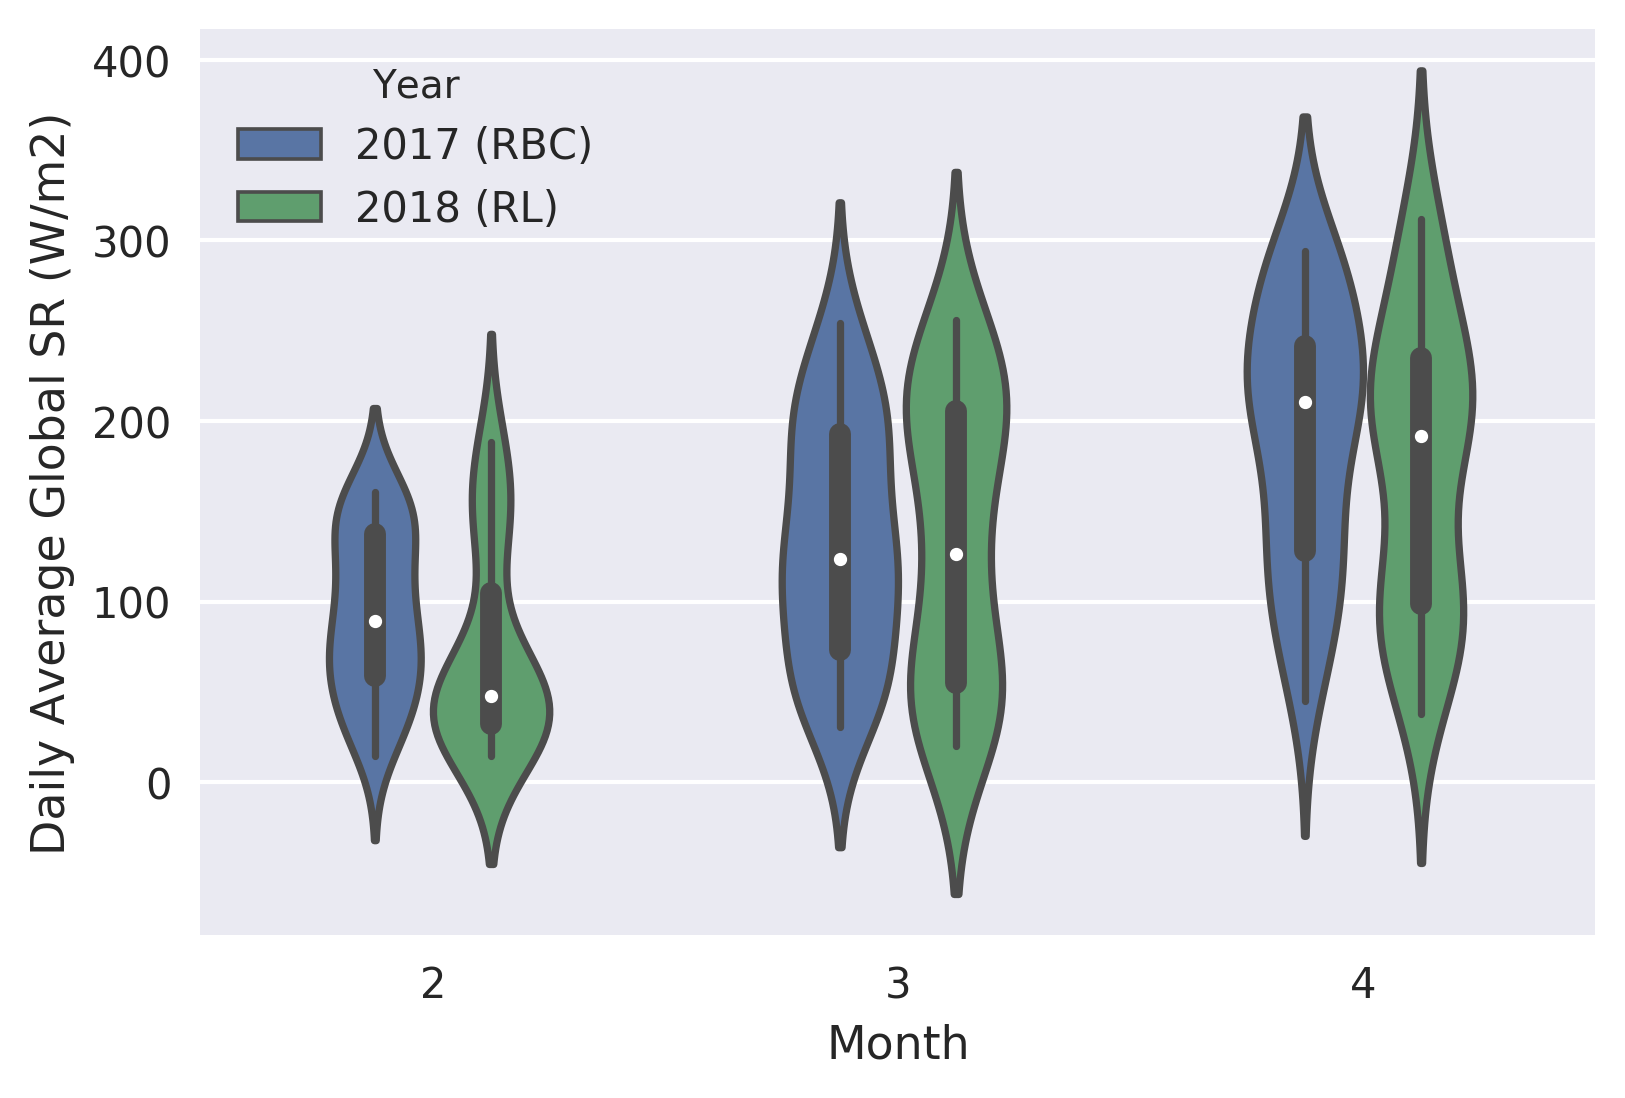

In [67]:
# base and rl solarGlob
base_solarGlob_daily_all_mat = [base_solarGlob_daily_all['solarRad'].as_matrix(), base_solarGlob_daily_all.index.month.values, 
                                base_solarGlob_daily_all.index.year.values, base_solarGlob_daily_all.index.weekday.values]
rl_solarGlob_daily_all_mat = [rl_solarGlob_daily_all['solarRad'].as_matrix(), rl_solarGlob_daily_all.index.month.values, 
                              rl_solarGlob_daily_all.index.year.values, rl_solarGlob_daily_all.index.weekday.values]
cmbd_solarGlob_daily_all_mat = [np.concatenate((base_solarGlob_daily_all_mat[0], rl_solarGlob_daily_all_mat[0])), 
                                np.concatenate((base_solarGlob_daily_all_mat[1], rl_solarGlob_daily_all_mat[1])),
                                np.concatenate((base_solarGlob_daily_all_mat[2], rl_solarGlob_daily_all_mat[2])),
                                np.concatenate((base_solarGlob_daily_all_mat[3], rl_solarGlob_daily_all_mat[3]))]

cmbd_solarGlob_daily_all_df = pd.DataFrame(np.array(cmbd_solarGlob_daily_all_mat).T, columns = ['Daily Average Global SR (W/m2)', 'Month', 'Year', 'Weekday']);
cmbd_solarGlob_daily_all_df.Month = cmbd_solarGlob_daily_all_df.Month.astype(int)
cmbd_solarGlob_daily_all_df.Year = cmbd_solarGlob_daily_all_df.Year.astype(int)

cmbd_solarGlob_daily_all_df.loc[cmbd_solarGlob_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_solarGlob_daily_all_df.loc[cmbd_solarGlob_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.violinplot(x = 'Month', y = 'Daily Average Global SR (W/m2)', hue = 'Year', data = cmbd_solarGlob_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

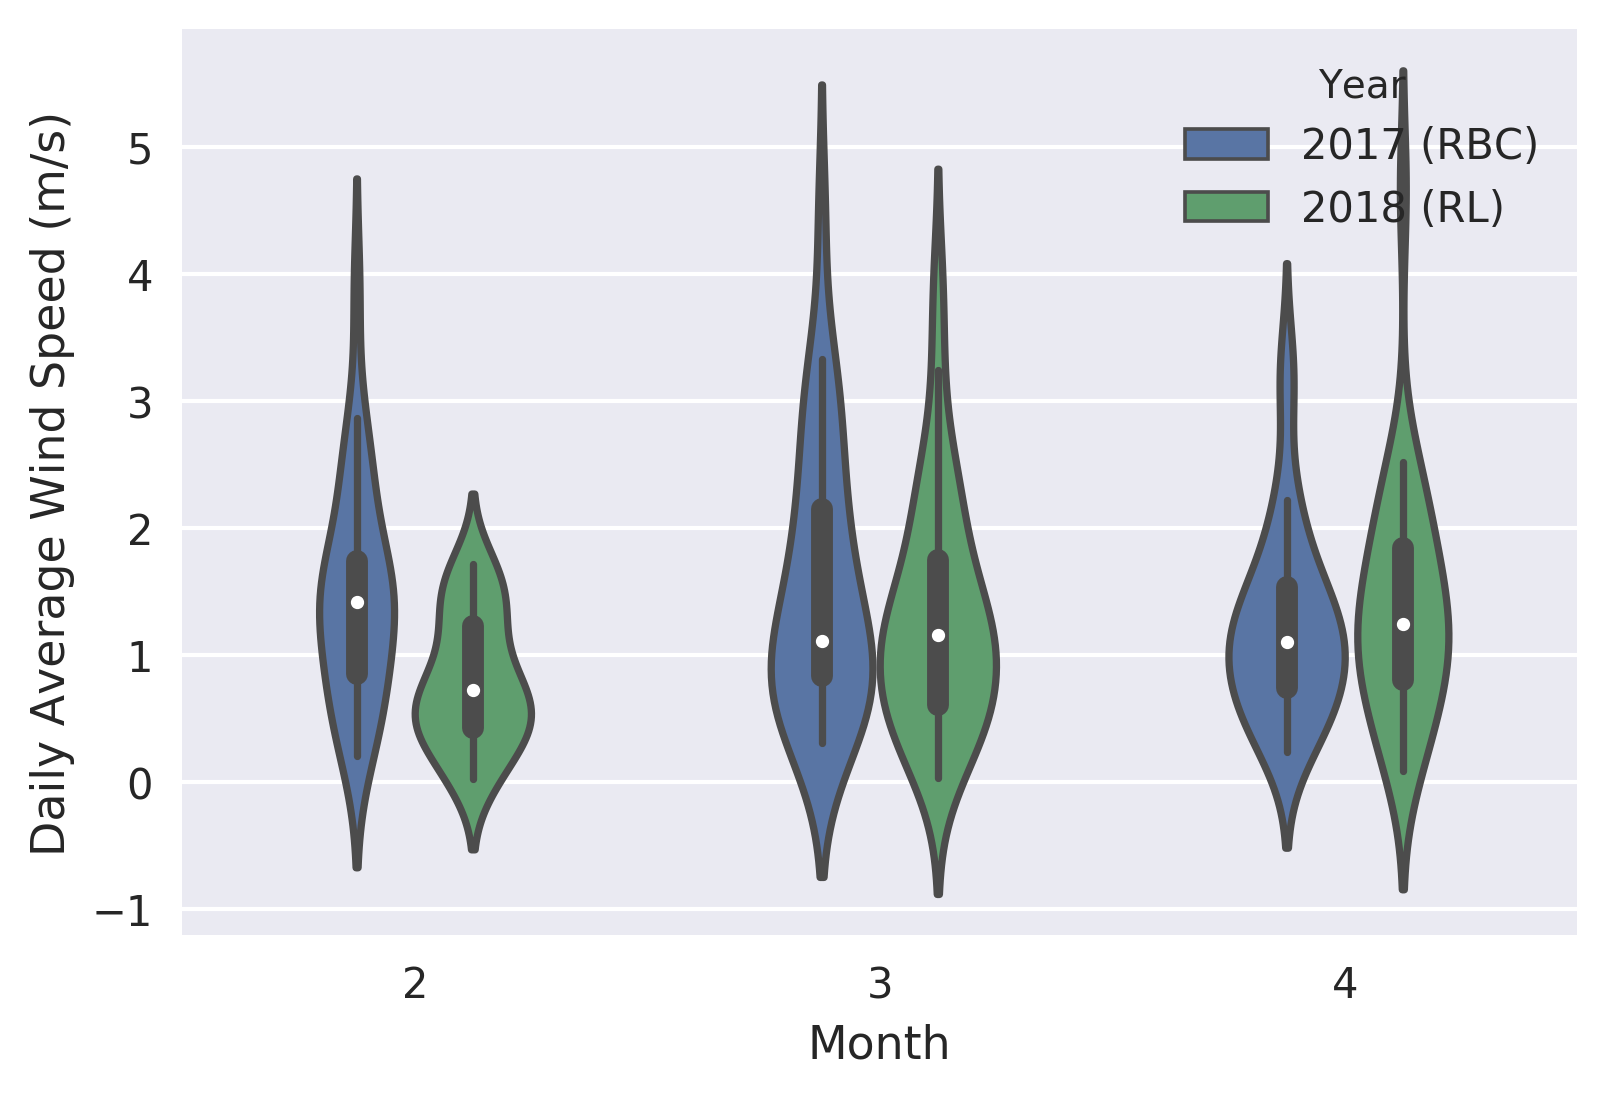

In [68]:
# base and rl ws
base_ws_daily_all_mat = [base_ws_daily_all['ws'].as_matrix(), base_ws_daily_all.index.month.values, 
                             base_ws_daily_all.index.year.values, base_ws_daily_all.index.weekday.values]
rl_ws_daily_all_mat = [rl_ws_daily_all['ws'].as_matrix(), rl_ws_daily_all.index.month.values, 
                           rl_ws_daily_all.index.year.values, rl_ws_daily_all.index.weekday.values]
cmbd_ws_daily_all_mat = [np.concatenate((base_ws_daily_all_mat[0], rl_ws_daily_all_mat[0])), 
                             np.concatenate((base_ws_daily_all_mat[1], rl_ws_daily_all_mat[1])),
                             np.concatenate((base_ws_daily_all_mat[2], rl_ws_daily_all_mat[2])),
                             np.concatenate((base_ws_daily_all_mat[3], rl_ws_daily_all_mat[3]))]

cmbd_ws_daily_all_df = pd.DataFrame(np.array(cmbd_ws_daily_all_mat).T, columns = ['Daily Average Wind Speed (m/s)', 
                                                                                          'Month', 'Year', 'Weekday']);
cmbd_ws_daily_all_df.Month = cmbd_ws_daily_all_df.Month.astype(int)
cmbd_ws_daily_all_df.Year = cmbd_ws_daily_all_df.Year.astype(int)

cmbd_ws_daily_all_df.loc[cmbd_ws_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_ws_daily_all_df.loc[cmbd_ws_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.violinplot(x = 'Month', y = 'Daily Average Wind Speed (m/s)', hue = 'Year', data = cmbd_ws_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

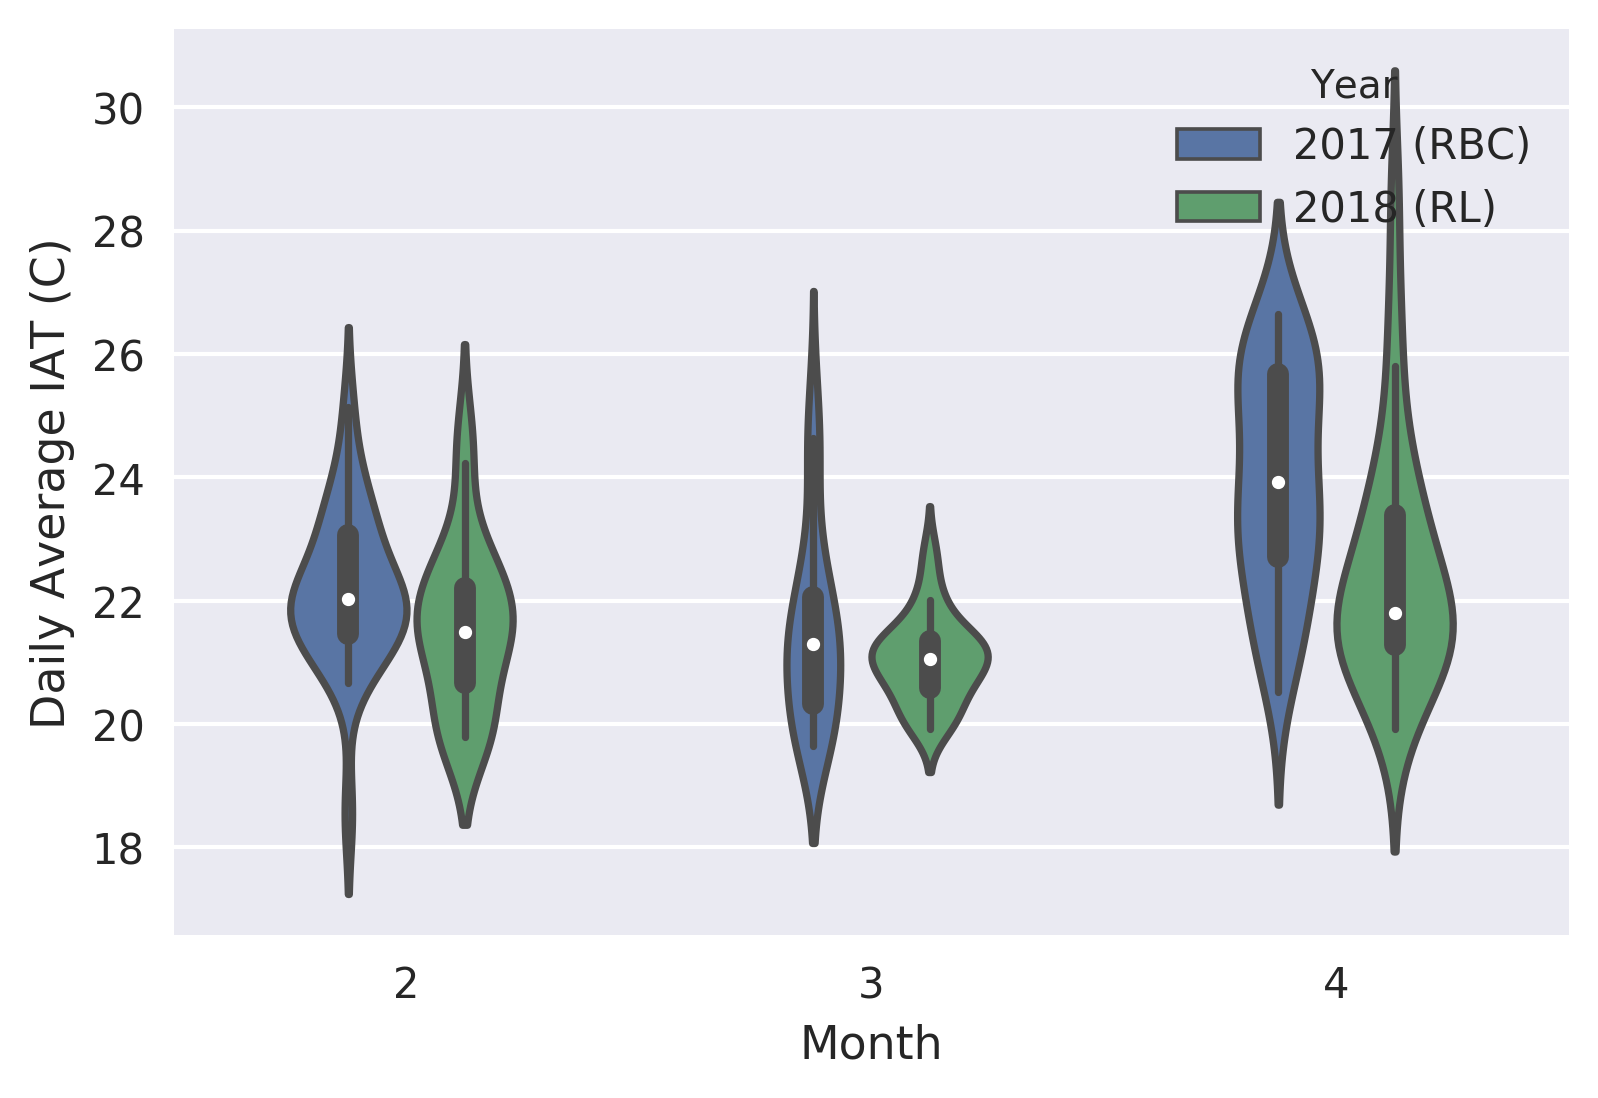

In [69]:
# base and rl iat
base_iat_daily_all_mat = [base_iat_daily_all['temp'].as_matrix(), base_iat_daily_all.index.month.values, 
                             base_iat_daily_all.index.year.values, base_iat_daily_all.index.weekday.values]
rl_iat_daily_all_mat = [rl_iat_daily_all['temp'].as_matrix(), rl_iat_daily_all.index.month.values, 
                           rl_iat_daily_all.index.year.values, rl_iat_daily_all.index.weekday.values]
cmbd_iat_daily_all_mat = [np.concatenate((base_iat_daily_all_mat[0], rl_iat_daily_all_mat[0])), 
                             np.concatenate((base_iat_daily_all_mat[1], rl_iat_daily_all_mat[1])),
                             np.concatenate((base_iat_daily_all_mat[2], rl_iat_daily_all_mat[2])),
                             np.concatenate((base_iat_daily_all_mat[3], rl_iat_daily_all_mat[3]))]

cmbd_iat_daily_all_df = pd.DataFrame(np.array(cmbd_iat_daily_all_mat).T, columns = ['Daily Average IAT (C)', 
                                                                                          'Month', 'Year', 'Weekday']);
cmbd_iat_daily_all_df.Month = cmbd_iat_daily_all_df.Month.astype(int)
cmbd_iat_daily_all_df.Year = cmbd_iat_daily_all_df.Year.astype(int)

cmbd_iat_daily_all_df.loc[cmbd_iat_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_iat_daily_all_df.loc[cmbd_iat_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.violinplot(x = 'Month', y = 'Daily Average IAT (C)', hue = 'Year', data = cmbd_iat_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

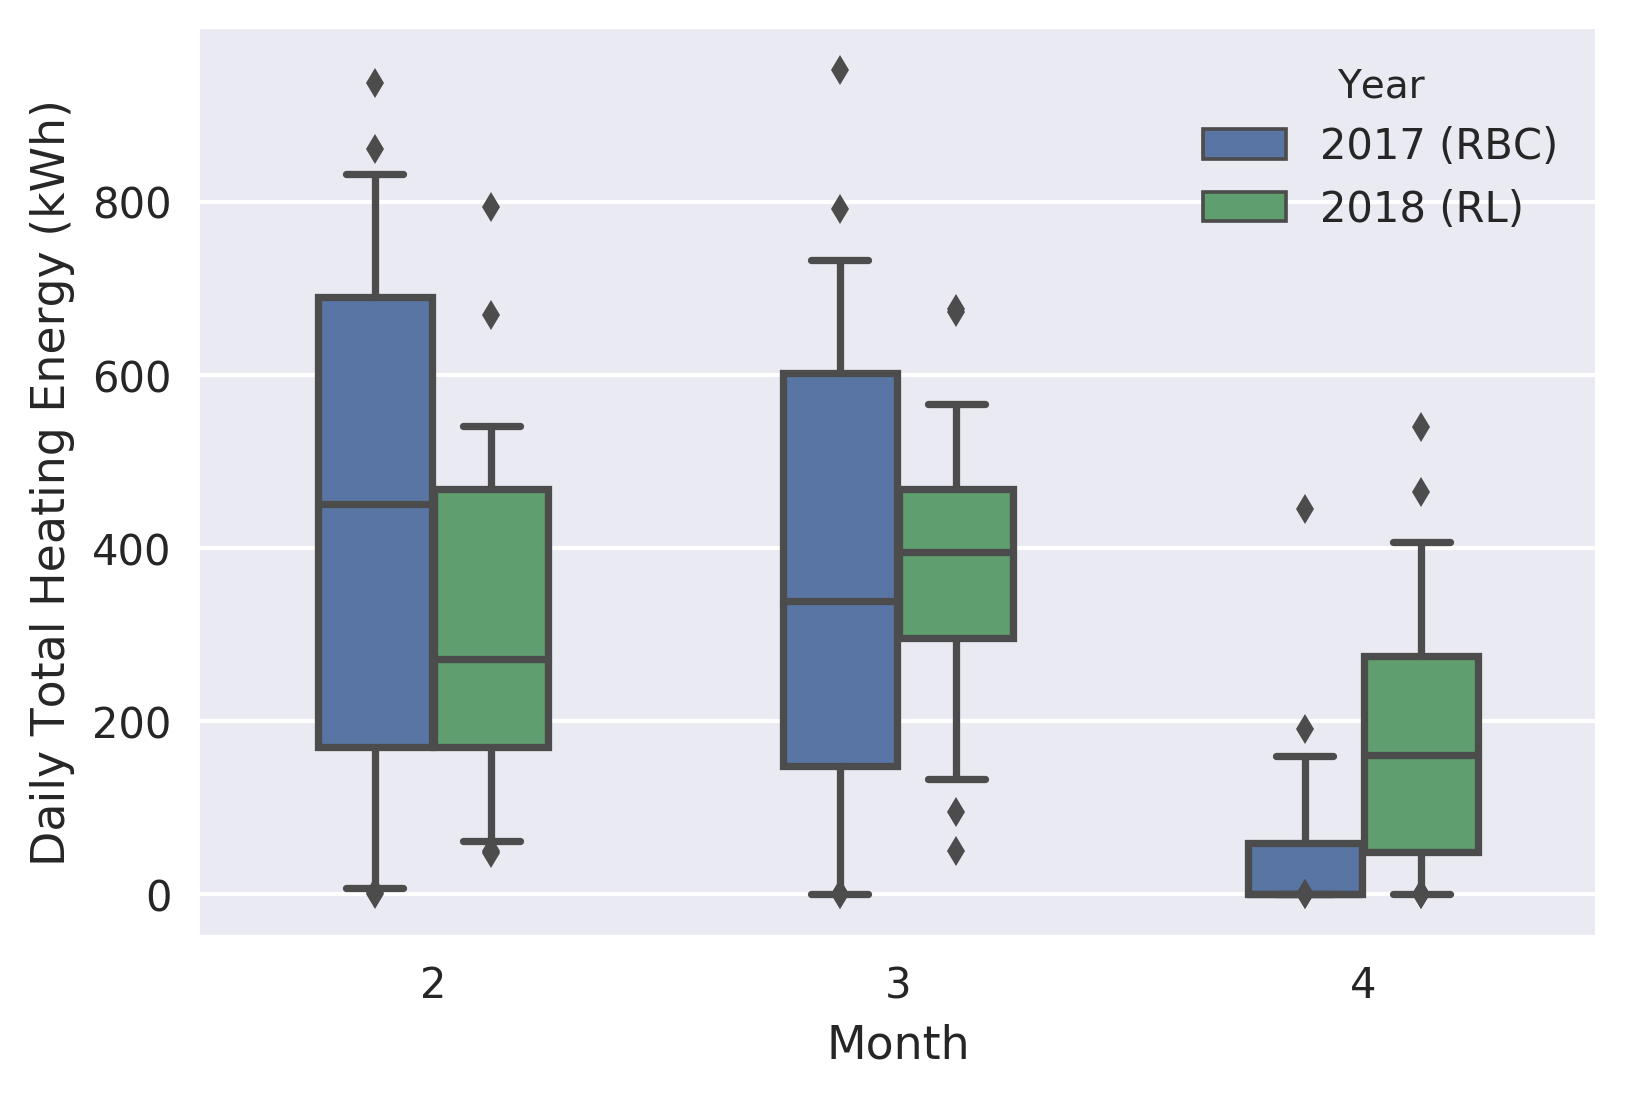

In [70]:
# base and rl energy
base_energy_daily_all_mat = [base_energy_daily_all['energy'].as_matrix(), base_energy_daily_all.index.month.values, 
                             base_energy_daily_all.index.year.values, base_energy_daily_all.index.weekday.values]
rl_energy_daily_all_mat = [rl_energy_daily_all['energy'].as_matrix(), rl_energy_daily_all.index.month.values, 
                           rl_energy_daily_all.index.year.values, rl_energy_daily_all.index.weekday.values]
cmbd_energy_daily_all_mat = [np.concatenate((base_energy_daily_all_mat[0], rl_energy_daily_all_mat[0])), 
                             np.concatenate((base_energy_daily_all_mat[1], rl_energy_daily_all_mat[1])),
                             np.concatenate((base_energy_daily_all_mat[2], rl_energy_daily_all_mat[2])),
                             np.concatenate((base_energy_daily_all_mat[3], rl_energy_daily_all_mat[3]))]

sns.set(font_scale=1.0)
cmbd_energy_daily_all_df = pd.DataFrame(np.array(cmbd_energy_daily_all_mat).T, columns = ['Daily Total Heating Energy (kWh)', 
                                                                                          'Month', 'Year', 'Weekday']);
cmbd_energy_daily_all_df.Month = cmbd_energy_daily_all_df.Month.astype(int)
cmbd_energy_daily_all_df.Year = cmbd_energy_daily_all_df.Year.astype(int)

cmbd_energy_daily_all_df.loc[cmbd_energy_daily_all_df['Year'] == 2017, 'Year'] = '2017 (RBC)'
cmbd_energy_daily_all_df.loc[cmbd_energy_daily_all_df['Year'] == 2018, 'Year'] = '2018 (RL)'

sns.boxplot(x = 'Month', y = 'Daily Total Heating Energy (kWh)', hue = 'Year', data = cmbd_energy_daily_all_df
            , palette = 'deep', width = 0.5, whis = [5, 95])

In [201]:
rl_energy_daily_all

,energy
time_utc,
2018-02-06 00:00:00-05:00,432.445444
2018-02-07 00:00:00-05:00,668.786646
2018-02-08 00:00:00-05:00,793.986184
2018-02-09 00:00:00-05:00,540.339356
2018-02-10 00:00:00-05:00,228.859399
2018-02-11 00:00:00-05:00,172.492424
2018-02-12 00:00:00-05:00,521.371672
2018-02-13 00:00:00-05:00,515.508071
2018-02-14 00:00:00-05:00,271.620526


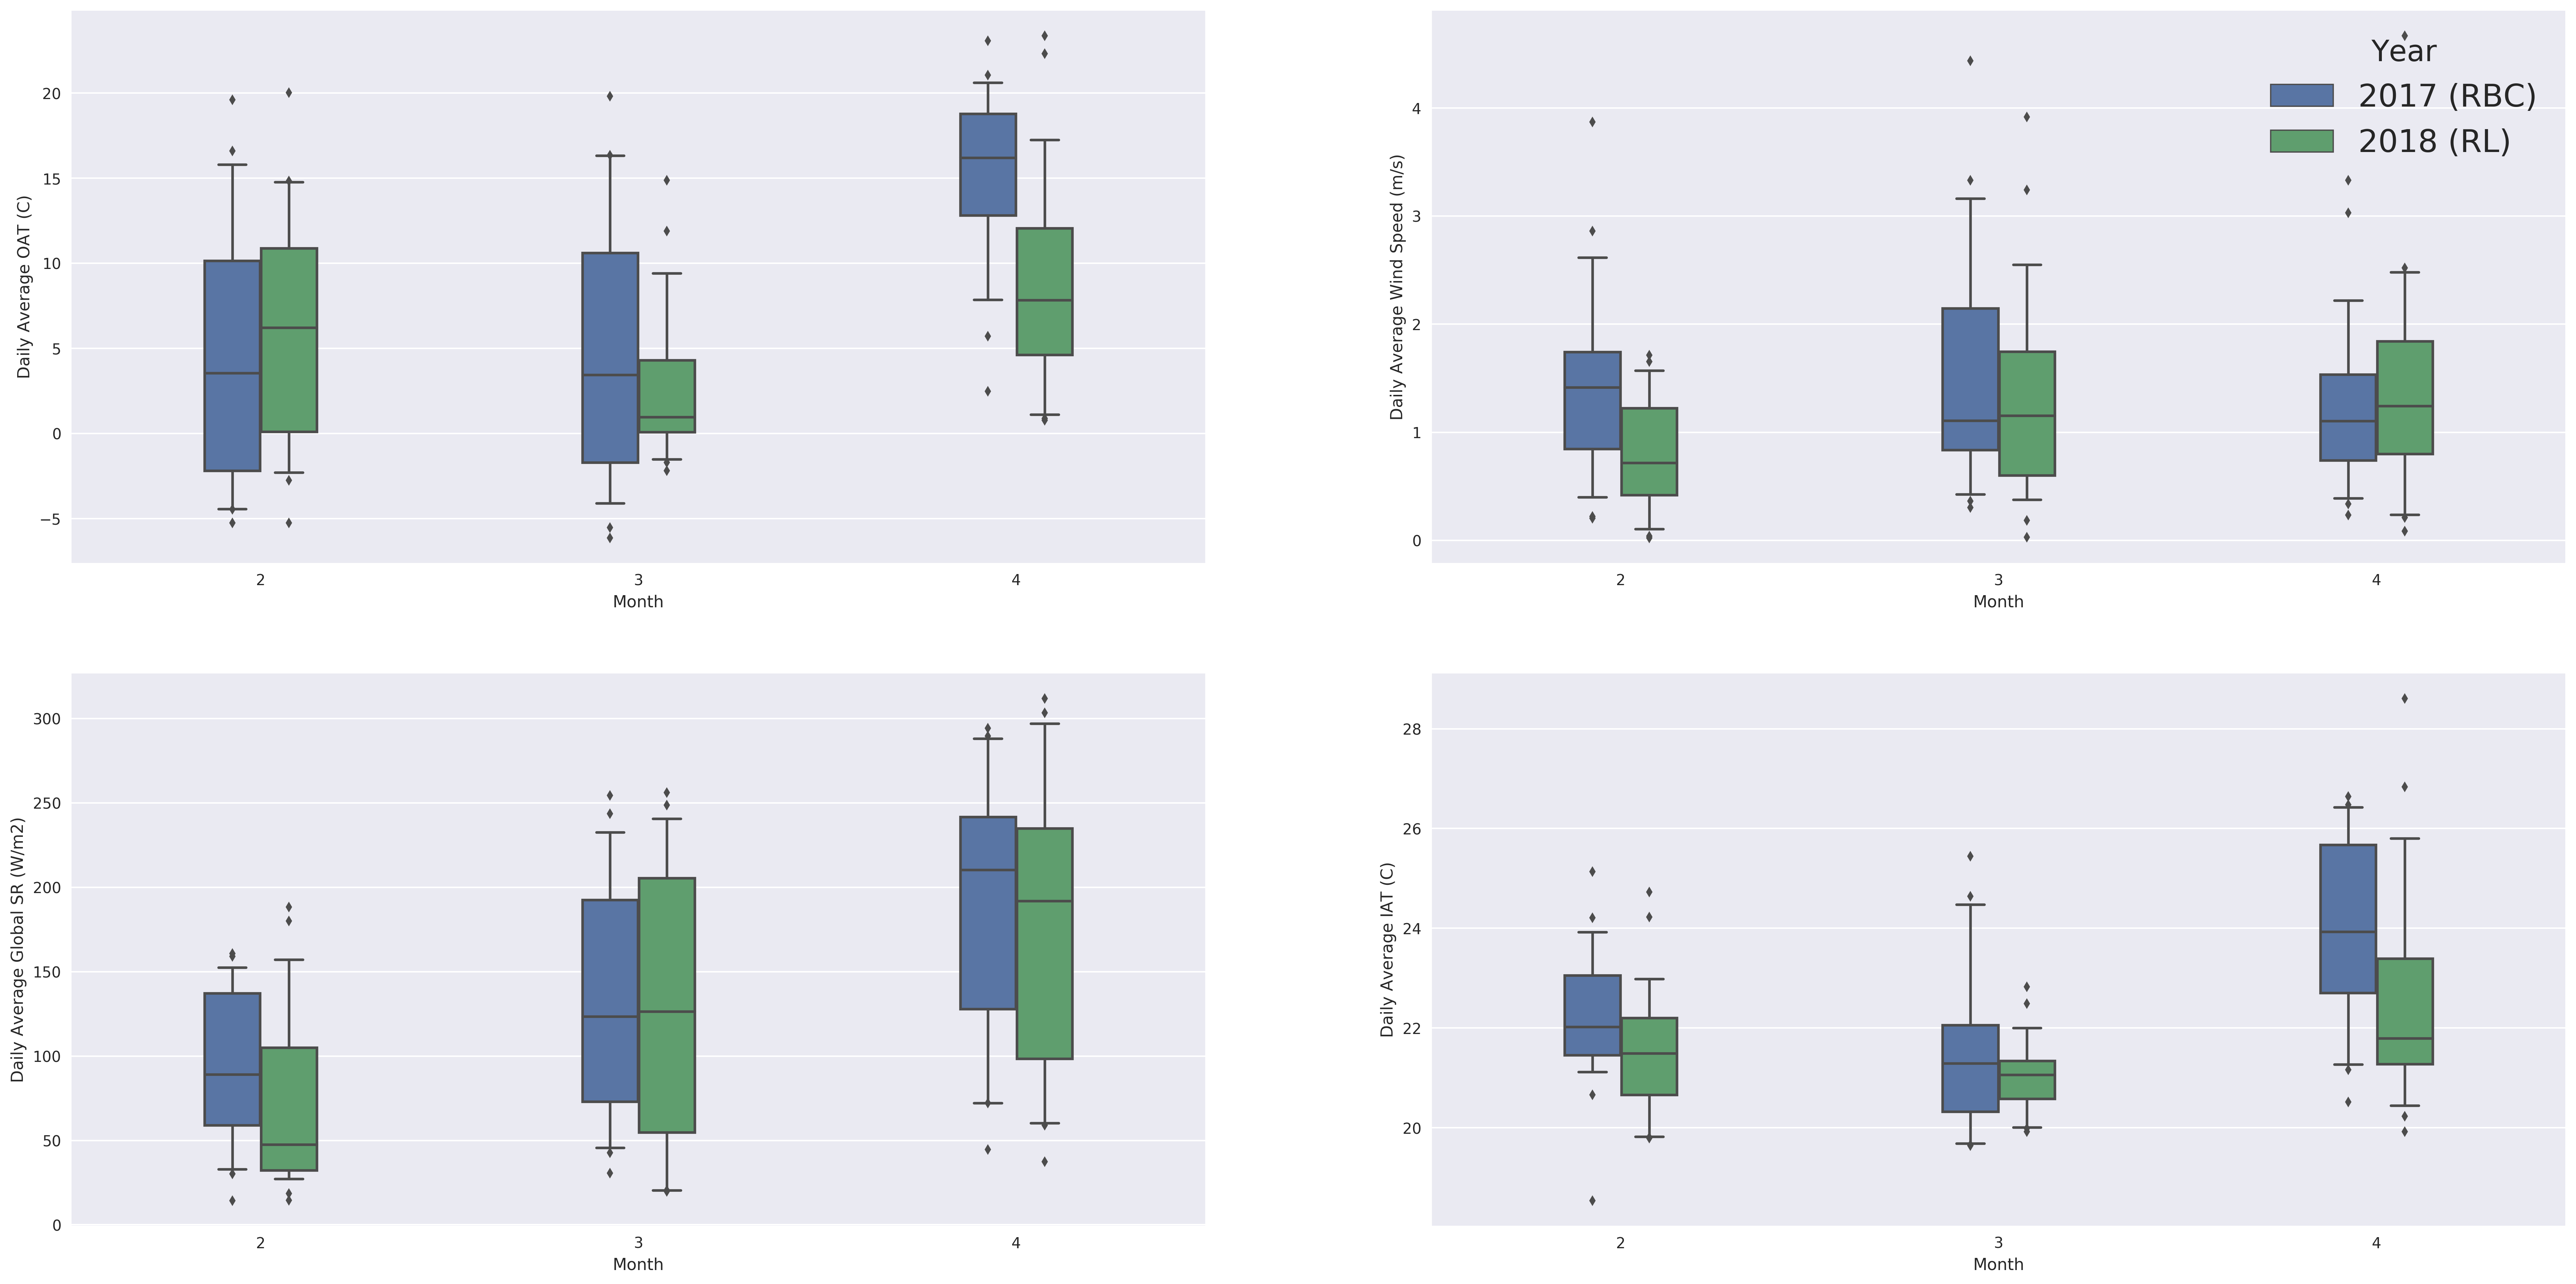

In [71]:
plt.figure(figsize=(30,15))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (0, 1))
ax4 = plt.subplot2grid((2, 2), (1, 1))
#ax3.set_ylim(0,500)
sns.set(font_scale=2.1)
sns.boxplot(x = 'Month', y = 'Daily Average OAT (C)', hue = 'Year', data = cmbd_oat_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax1)
sns.boxplot(x = 'Month', y = 'Daily Average Global SR (W/m2)', hue = 'Year', data = cmbd_solarGlob_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax2)
sns.boxplot(x = 'Month', y = 'Daily Average Wind Speed (m/s)', hue = 'Year', data = cmbd_ws_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax3)
sns.boxplot(x = 'Month', y = 'Daily Average IAT (C)', hue = 'Year', data = cmbd_iat_daily_all_df
            , palette = 'deep', width = 0.3, whis = [5, 95], ax=ax4)


ax1.legend_.remove()
ax2.legend_.remove()
ax4.legend_.remove()

In [72]:
# Use GP to predict
rl_all_daily_all_df = pd.concat([cmbd_oat_daily_all_df['Daily Average OAT (C)'], cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'], 
                                 cmbd_iat_daily_all_df['Daily Average IAT (C)'], cmbd_energy_daily_all_df], axis=1)
rl_all_daily_all_df = rl_all_daily_all_df.loc[(rl_all_daily_all_df['Year'] == '2018 (RL)') &
                                             (rl_all_daily_all_df["Daily Total Heating Energy (kWh)"] > 40)]
rl_gp_x = rl_all_daily_all_df[['Daily Average OAT (C)','Daily Average Global SR (W/m2)','Daily Average IAT (C)']].as_matrix()
rl_gp_y = rl_all_daily_all_df[['Daily Total Heating Energy (kWh)']].as_matrix()
# Normalize x y
rl_gp_x_stdized = std_scaler_x.transform(rl_gp_x)
rl_gp_y_stdized = std_scaler_y.transform(rl_gp_y)

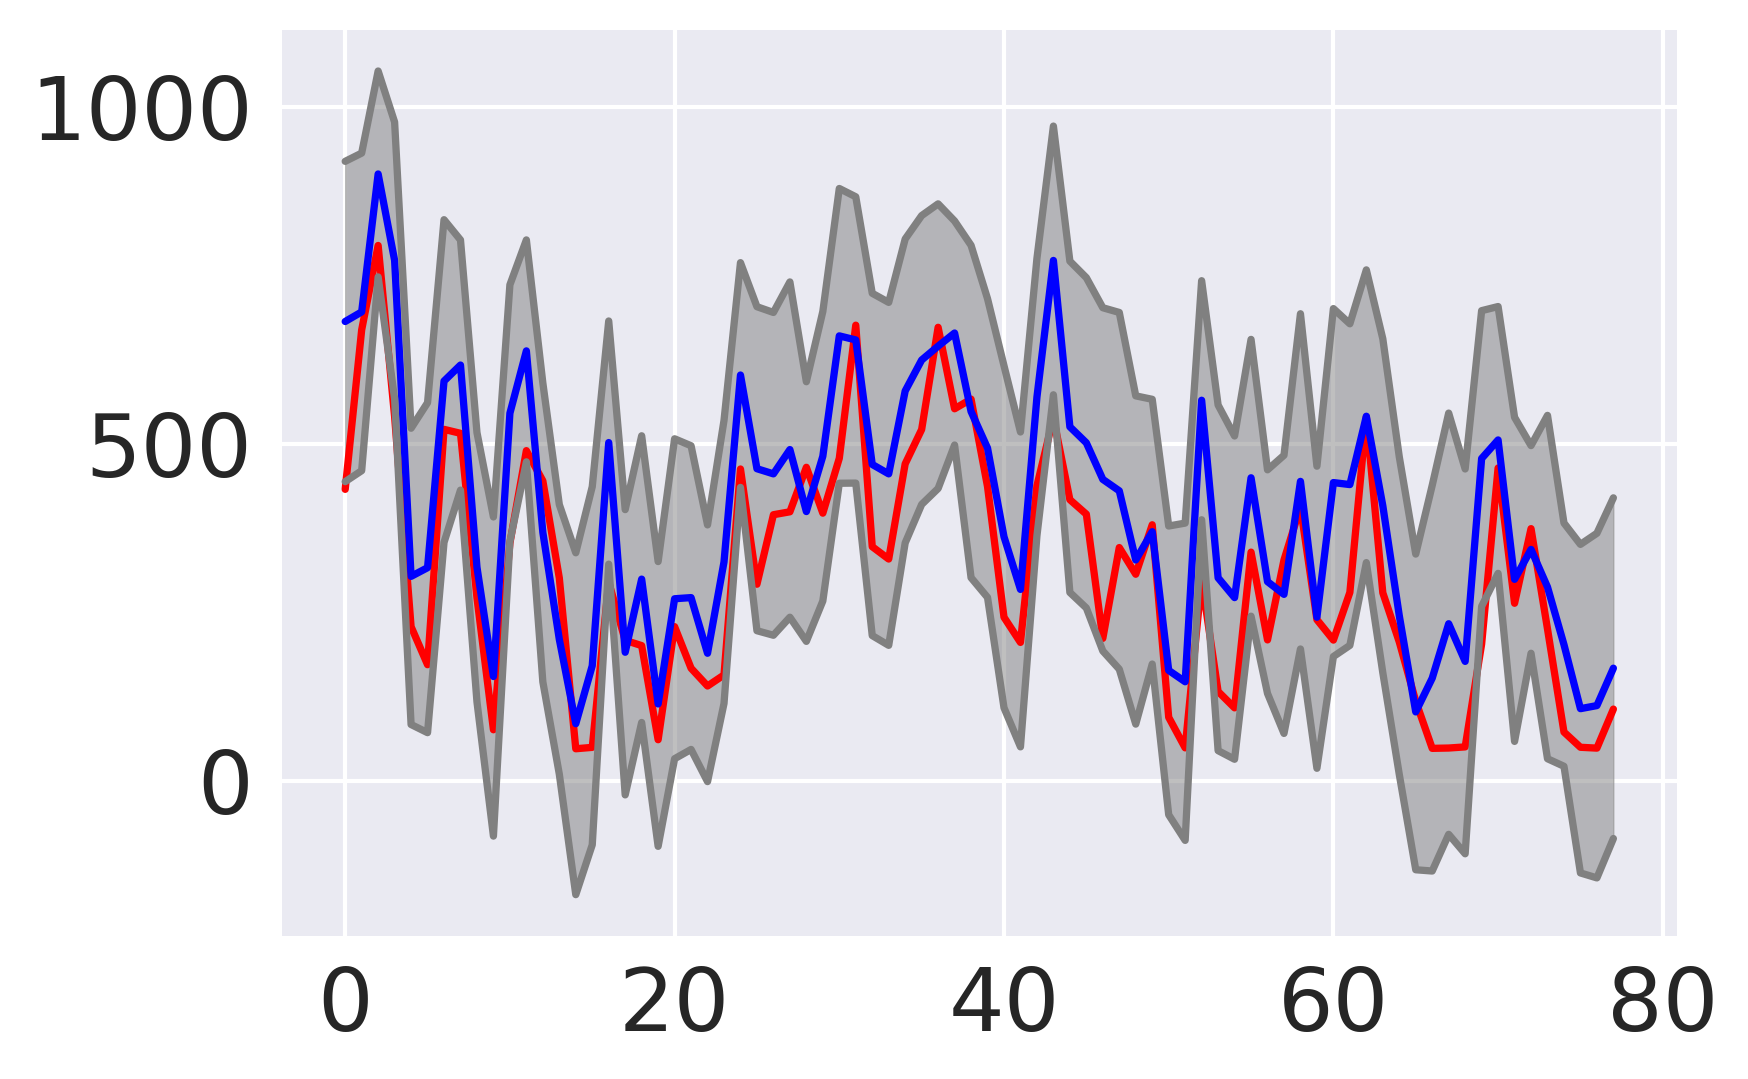

In [73]:
# Use GP to predict
rl_gp_y_pred, rl_gp_y_pred_std = rg.predict(rl_gp_x_stdized, return_std=True)
rl_gp_y_pred = np.ravel(rl_gp_y_pred)
rl_gp_y_pred_org = std_scaler_y.inverse_transform(rl_gp_y_pred) 
rl_gp_y_pred_org_std = std_scaler_y.inverse_transform(rl_gp_y_pred_std) - std_scaler_y.mean_

x_plot = np.array(range(78))
plt.plot(x_plot, rl_gp_y, '-r')
plt.plot(x_plot, rl_gp_y_pred_org, '-b')
plt.plot(x_plot, rl_gp_y_pred_org - 1.9600 * rl_gp_y_pred_org_std, 'grey')
plt.plot(x_plot, rl_gp_y_pred_org + 1.9600 * rl_gp_y_pred_org_std, 'grey')
plt.fill_between(x_plot, rl_gp_y_pred_org - 1.9600 * rl_gp_y_pred_org_std, 
                 rl_gp_y_pred_org + 1.9600 * rl_gp_y_pred_org_std, color='grey', alpha='0.5')

In [74]:
# Use GP to sample
sample_num = 5000
rl_gp_y_sampled = rg.sample_y(rl_gp_x_stdized, n_samples = sample_num);
rl_gp_y_sampled = std_scaler_y.inverse_transform(rl_gp_y_sampled)
rl_gp_y_sampled = rl_gp_y_sampled.squeeze().T
rl_gp_y_sampled = rl_gp_y_sampled.clip(0)

for row_i in range(rl_gp_y_sampled.shape[0]):
    rl_all_daily_all_df['y_sampled_%s'%(row_i)] = pd.Series(rl_gp_y_sampled[row_i, :], index=rl_all_daily_all_df.index)


In [158]:
rl_gp_y_sampled[0, :]

array([691.41187321, 565.59948327, 952.70903788, 951.28131878,
        38.3793095 , 259.77284018, 643.91000206, 592.89363315,
       179.31556221, 268.85367013, 599.94530685, 576.62057921,
       156.58456578, 153.47348673,  24.03197204, 237.7950426 ,
       391.70079387,  87.11561907, 158.94793569, 153.64405436,
        75.29836817,   0.        , 157.58974063, 280.56942009,
       489.15586613, 596.47717056, 555.25635665, 627.91068043,
       359.84040421, 257.603718  , 623.97854637, 721.09100124,
       579.15879301, 475.90830913, 666.5496568 , 685.75772737,
       726.95435056, 721.11004594, 716.99893045, 540.00819465,
       194.4086229 , 124.99987335, 582.14512775, 860.43682259,
       857.52530819, 691.42507919, 468.05828334, 759.34781866,
       383.54526568, 298.78827962,  80.57607384,  82.93541053,
       400.40597972, 416.52060178, 334.52659638, 460.36098968,
       282.89623051, 224.82558267, 559.67663171, 228.41171598,
       603.71754998, 524.36286621, 679.21060458, 376.05

In [193]:
# Analyze monthly energy distribution

rl_monthly_sampled_y = rl_all_daily_all_df.groupby('Month').sum()
rl_monthly_sampled_y_dp = rl_monthly_sampled_y.drop(['Weekday', 'Daily Average OAT (C)', 'Daily Average IAT (C)',
                                                  'Daily Average Global SR (W/m2)',
                                                 'Daily Total Heating Energy (kWh)'], axis = 1)
rl_monthly_sampled_y_mat = rl_monthly_sampled_y_dp.as_matrix()

In [194]:
total = rl_monthly_sampled_y_mat.sum(axis = 0)
rl_pred_feb_hist_rge = [int(math.floor((total.min())/ 10.0)) * 10 ,
                        int(math.ceil((total.max())/ 10.0)) * 10]
rl_hist_bin_itv = (rl_pred_feb_hist_rge[1] - rl_pred_feb_hist_rge[0])/1000
rl_pred_feb_hist_x = np.arange(rl_pred_feb_hist_rge[0], rl_pred_feb_hist_rge[1], rl_hist_bin_itv)
rl_pred_feb_hist, rl_pred_feb_bin_edges = np.histogram(total, bins=1000, 
                                                       range = rl_pred_feb_hist_rge)
rl_pred_feb_cumsum = 100 * np.cumsum(rl_pred_feb_hist/5000)
rl_pred_feb_5pct_y_idx = np.where(rl_pred_feb_cumsum < 5)[-1][-1]
rl_pred_feb_5pct_y = rl_pred_feb_cumsum[rl_pred_feb_5pct_y_idx]
rl_pred_feb_5pct_x = rl_pred_feb_hist_x[rl_pred_feb_5pct_y_idx]

In [199]:
rl_pred_feb_5pct_x

28922.360000000204

In [163]:
rl_monthly_sampled_y_mat

array([[ 7916.87419536,  8780.92067902,  9538.79125321, ...,
         9411.61941821,  9985.68181599,  9377.19587846],
       [15825.44771872, 15119.57606853, 14894.85226314, ...,
        15200.67385493, 15625.99483085, 15151.94634079],
       [ 7881.03317185,  6517.8355424 ,  7291.86494122, ...,
         7752.76631875,  7696.43819501,  7661.15456757]])

In [147]:
import math
rl_hist_bin = 1000
rl_pred_feb_hist_rge = [int(math.floor((rl_monthly_sampled_y_mat[0, :].min())/ 10.0)) * 10 ,
                        int(math.ceil((rl_monthly_sampled_y_mat[0, :].max())/ 10.0)) * 10]
rl_pred_feb_hist, rl_pred_feb_bin_edges = np.histogram(rl_monthly_sampled_y_mat[0, :], bins=rl_hist_bin, 
                                                       range = rl_pred_feb_hist_rge)
rl_hist_bin_itv = (rl_pred_feb_hist_rge[1] - rl_pred_feb_hist_rge[0])/rl_hist_bin
rl_pred_feb_hist_x = np.arange(rl_pred_feb_hist_rge[0], rl_pred_feb_hist_rge[1], rl_hist_bin_itv)

rl_pred_feb_cumsum = 100 * np.cumsum(rl_pred_feb_hist/sample_num)

mpl.rcParams.update(mpl.rcParamsDefault)


rl_pred_feb_5pct_y_idx = np.where(rl_pred_feb_cumsum < 5)[-1][-1]
rl_pred_feb_5pct_y = rl_pred_feb_cumsum[rl_pred_feb_5pct_y_idx]
rl_pred_feb_5pct_x = rl_pred_feb_hist_x[rl_pred_feb_5pct_y_idx]
rl_pred_feb_10pct_y_idx = np.where(rl_pred_feb_cumsum < 10)[-1][-1]
rl_pred_feb_10pct_y = rl_pred_feb_cumsum[rl_pred_feb_10pct_y_idx]
rl_pred_feb_10pct_x = rl_pred_feb_hist_x[rl_pred_feb_10pct_y_idx]


In [148]:
rl_hist_bin = 1000
rl_pred_mar_hist_rge = [int(math.floor((rl_monthly_sampled_y_mat[1, :].min())/ 10.0)) * 10 ,
                        int(math.ceil((rl_monthly_sampled_y_mat[1, :].max())/ 10.0)) * 10]
rl_pred_mar_hist, rl_pred_mar_bin_edges = np.histogram(rl_monthly_sampled_y_mat[1, :], bins=rl_hist_bin, 
                                                       range = rl_pred_mar_hist_rge)
rl_hist_bin_itv = (rl_pred_mar_hist_rge[1] - rl_pred_mar_hist_rge[0])/rl_hist_bin
rl_pred_mar_hist_x = np.arange(rl_pred_mar_hist_rge[0], rl_pred_mar_hist_rge[1], rl_hist_bin_itv)

rl_pred_mar_cumsum = 100 * np.cumsum(rl_pred_mar_hist/sample_num)

rl_pred_mar_5pct_y_idx = np.where(rl_pred_mar_cumsum < 5)[-1][-1]
rl_pred_mar_5pct_y = rl_pred_mar_cumsum[rl_pred_mar_5pct_y_idx]
rl_pred_mar_5pct_x = rl_pred_mar_hist_x[rl_pred_mar_5pct_y_idx]
rl_pred_mar_10pct_y_idx = np.where(rl_pred_mar_cumsum < 10)[-1][-1]
rl_pred_mar_10pct_y = rl_pred_mar_cumsum[rl_pred_mar_10pct_y_idx]
rl_pred_mar_10pct_x = rl_pred_mar_hist_x[rl_pred_mar_10pct_y_idx]


In [149]:
rl_hist_bin = 1000
rl_pred_apr_hist_rge = [int(math.floor((rl_monthly_sampled_y_mat[2, :].min())/ 10.0)) * 10 ,
                        int(math.ceil((rl_monthly_sampled_y_mat[2, :].max())/ 10.0)) * 10]
rl_pred_apr_hist, rl_pred_apr_bin_edges = np.histogram(rl_monthly_sampled_y_mat[2, :], bins=rl_hist_bin, 
                                                       range = rl_pred_apr_hist_rge)
rl_hist_bin_itv = (rl_pred_apr_hist_rge[1] - rl_pred_apr_hist_rge[0])/rl_hist_bin
rl_pred_apr_hist_x = np.arange(rl_pred_apr_hist_rge[0], rl_pred_apr_hist_rge[1], rl_hist_bin_itv)

rl_pred_apr_cumsum = 100 * np.cumsum(rl_pred_apr_hist/sample_num)

rl_pred_apr_5pct_y_idx = np.where(rl_pred_apr_cumsum < 5)[-1][-1]
rl_pred_apr_5pct_y = rl_pred_apr_cumsum[rl_pred_apr_5pct_y_idx]
rl_pred_apr_5pct_x = rl_pred_apr_hist_x[rl_pred_apr_5pct_y_idx]
rl_pred_apr_10pct_y_idx = np.where(rl_pred_apr_cumsum < 10)[-1][-1]
rl_pred_apr_10pct_y = rl_pred_apr_cumsum[rl_pred_apr_10pct_y_idx]
rl_pred_apr_10pct_x = rl_pred_apr_hist_x[rl_pred_apr_10pct_y_idx]


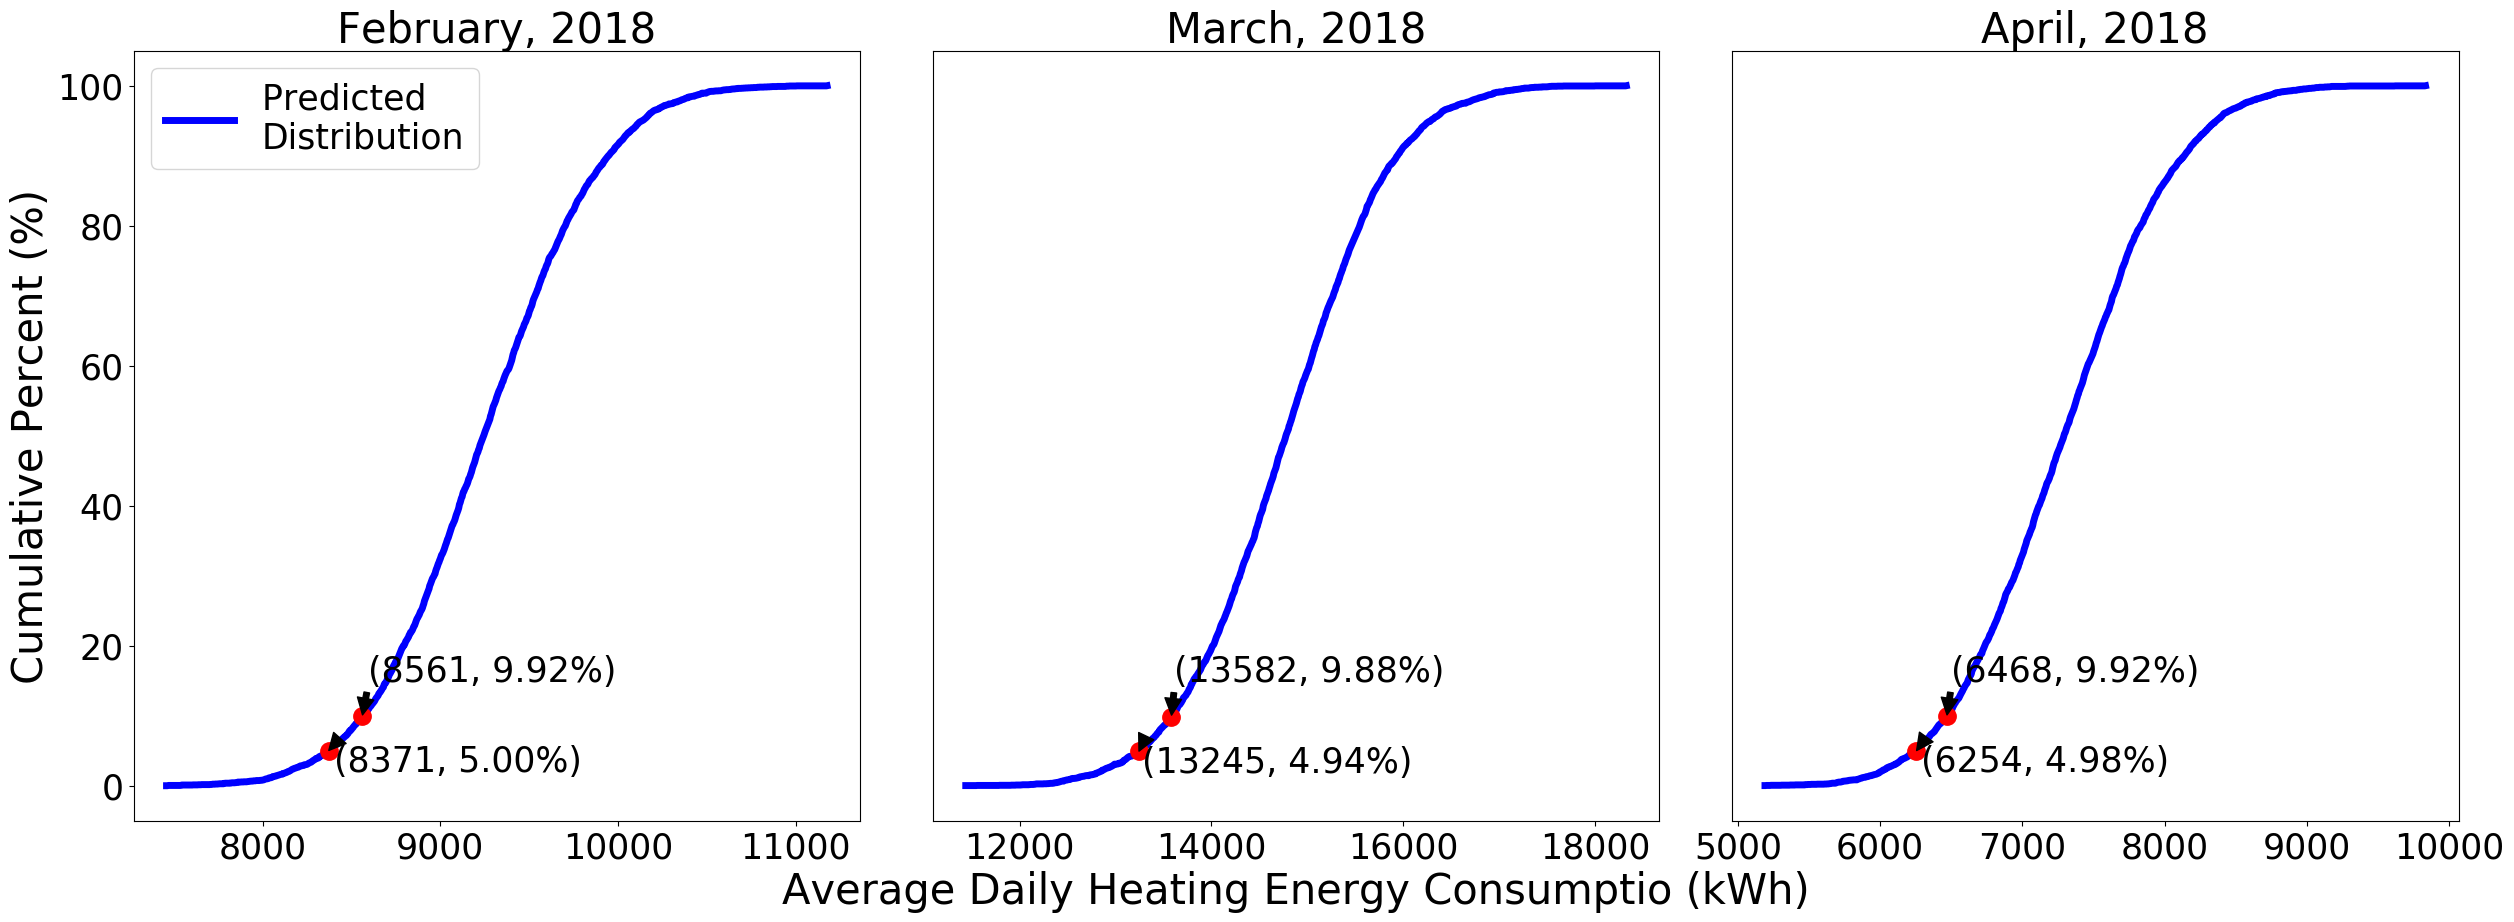

In [151]:
fig = plt.figure(figsize=(30, 10))
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1), sharey=ax1)
ax3 = plt.subplot2grid((1, 3), (0, 2), sharey=ax1)

ax1.plot(rl_pred_feb_hist_x, rl_pred_feb_cumsum, 'b', linewidth=5.0, label = 'Predicted \nDistribution')
ax1.plot(rl_pred_feb_5pct_x, rl_pred_feb_5pct_y, '.r', markersize=25.0)
ax1.annotate('(%d, %.2f%%)'%(rl_pred_feb_5pct_x, rl_pred_feb_5pct_y), 
             xy=(rl_pred_feb_5pct_x, rl_pred_feb_5pct_y), xytext=(rl_pred_feb_5pct_x + 30, rl_pred_feb_5pct_y - 3),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax1.plot(rl_pred_feb_10pct_x, rl_pred_feb_10pct_y, '.r', markersize=25.0)
ax1.annotate('(%d, %.2f%%)'%(rl_pred_feb_10pct_x, rl_pred_feb_10pct_y), 
             xy=(rl_pred_feb_10pct_x, rl_pred_feb_10pct_y), xytext=(rl_pred_feb_10pct_x + 30, rl_pred_feb_10pct_y + 5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax1.tick_params(labelsize = 25)
ax1.set_ylabel('Cumulative Percent (%)', fontsize = 30)
ax1.set_title('February, 2018', fontsize = 30)
ax1.legend(fontsize = 25, loc="upper left")

ax2.plot(rl_pred_mar_hist_x, rl_pred_mar_cumsum, 'b', linewidth=5.0)
ax2.plot(rl_pred_mar_5pct_x, rl_pred_mar_5pct_y, '.r', markersize=25.0)
ax2.annotate('(%d, %.2f%%)'%(rl_pred_mar_5pct_x, rl_pred_mar_5pct_y), 
             xy=(rl_pred_mar_5pct_x, rl_pred_mar_5pct_y), xytext=(rl_pred_mar_5pct_x + 30, rl_pred_mar_5pct_y - 3),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax2.plot(rl_pred_mar_10pct_x, rl_pred_mar_10pct_y, '.r', markersize=25.0)
ax2.annotate('(%d, %.2f%%)'%(rl_pred_mar_10pct_x, rl_pred_mar_10pct_y), 
             xy=(rl_pred_mar_10pct_x, rl_pred_mar_10pct_y), xytext=(rl_pred_mar_10pct_x + 30, rl_pred_mar_10pct_y + 5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax2.tick_params(labelsize = 25)
ax2.set_xlabel('Average Daily Heating Energy Consumptio (kWh)', fontsize = 30)
ax2.set_title('March, 2018', fontsize = 30)

ax3.plot(rl_pred_apr_hist_x, rl_pred_apr_cumsum, 'b', linewidth=5.0)
ax3.plot(rl_pred_apr_5pct_x, rl_pred_apr_5pct_y, '.r', markersize=25.0)
ax3.annotate('(%d, %.2f%%)'%(rl_pred_apr_5pct_x, rl_pred_apr_5pct_y), 
             xy=(rl_pred_apr_5pct_x, rl_pred_apr_5pct_y), xytext=(rl_pred_apr_5pct_x + 30, rl_pred_apr_5pct_y - 3),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax3.plot(rl_pred_apr_10pct_x, rl_pred_apr_10pct_y, '.r', markersize=25.0)
ax3.annotate('(%d, %.2f%%)'%(rl_pred_apr_10pct_x, rl_pred_apr_10pct_y), 
             xy=(rl_pred_apr_10pct_x, rl_pred_apr_10pct_y), xytext=(rl_pred_apr_10pct_x + 30, rl_pred_apr_10pct_y + 5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 25
            )
ax3.tick_params(labelsize = 25)
ax3.set_title('April, 2018', fontsize = 30)

ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
fig.subplots_adjust(wspace=0.1)

In [103]:
ax1.get_xaxis().setp('labelsize', 20)

AttributeError: 'XAxis' object has no attribute 'setp'

In [104]:
rl_pred_jan_cumsum

NameError: name 'rl_pred_jan_cumsum' is not defined

In [188]:
rl_monthly_sampled_y

,Daily Average OAT (C),Daily Average Global SR (W/m2),Daily Average IAT (C),Daily Total Heating Energy (kWh),Weekday,y_sampled_0,y_sampled_1,y_sampled_2,y_sampled_3,y_sampled_4,...,y_sampled_4990,y_sampled_4991,y_sampled_4992,y_sampled_4993,y_sampled_4994,y_sampled_4995,y_sampled_4996,y_sampled_4997,y_sampled_4998,y_sampled_4999
Month,,,,,,,,,,,,,,,,,,,,,
2,140.776490,1644.137887,496.468010,7210.145387,66.0,7916.874195,8780.920679,9538.791253,10264.104814,9891.433794,...,9859.515155,8527.417445,9646.570973,9825.839138,9160.336127,9162.441531,9764.483465,9411.619418,9985.681816,9377.195878
3,80.478929,4208.200846,652.458526,11674.506849,96.0,15825.447719,15119.576069,14894.852263,13911.457066,13987.580747,...,14937.386591,15492.048104,14488.622370,14674.022177,15437.871968,14061.015186,14350.265511,15200.673855,15625.994831,15151.946341
4,203.788813,4276.324767,537.446544,5218.764978,69.0,7881.033172,6517.835542,7291.864941,7961.789696,6522.347738,...,7139.146618,6839.379032,7016.864764,6669.469189,6783.931444,8933.943486,6643.754585,7752.766319,7696.438195,7661.154568


In [104]:
# Statistics on base
base_oat_daily_feb = cmbd_oat_daily_all_df['Daily Average OAT (C)'][(cmbd_oat_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_oat_daily_all_df["Month"] == 2)]
base_oat_daily_mar = cmbd_oat_daily_all_df['Daily Average OAT (C)'][(cmbd_oat_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_oat_daily_all_df["Month"] == 3)]
base_oat_daily_apr = cmbd_oat_daily_all_df['Daily Average OAT (C)'][(cmbd_oat_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_oat_daily_all_df["Month"] == 4)]
base_oat_daily_feb_mean = np.mean(base_oat_daily_feb)
base_oat_daily_mar_mean = np.mean(base_oat_daily_mar)
base_oat_daily_apr_mean = np.mean(base_oat_daily_apr)
base_oat_daily_feb_std = np.std(base_oat_daily_feb)
base_oat_daily_mar_std = np.std(base_oat_daily_mar)
base_oat_daily_apr_std = np.std(base_oat_daily_apr)

base_sr_daily_feb = cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'][(cmbd_solarGlob_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_solarGlob_daily_all_df["Month"] == 2)]
base_sr_daily_mar = cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'][(cmbd_solarGlob_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_solarGlob_daily_all_df["Month"] == 3)]
base_sr_daily_apr = cmbd_solarGlob_daily_all_df['Daily Average Global SR (W/m2)'][(cmbd_solarGlob_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_solarGlob_daily_all_df["Month"] == 4)]
base_sr_daily_feb_mean = np.mean(base_sr_daily_feb)
base_sr_daily_mar_mean = np.mean(base_sr_daily_mar)
base_sr_daily_apr_mean = np.mean(base_sr_daily_apr)
base_sr_daily_feb_std = np.std(base_sr_daily_feb)
base_sr_daily_mar_std = np.std(base_sr_daily_mar)
base_sr_daily_apr_std = np.std(base_sr_daily_apr)

base_ht_daily_feb = cmbd_energy_daily_all_df['Daily Total Heating Energy (kWh)'][(cmbd_energy_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_energy_daily_all_df["Month"] == 2)]
base_ht_daily_mar = cmbd_energy_daily_all_df['Daily Total Heating Energy (kWh)'][(cmbd_energy_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_energy_daily_all_df["Month"] == 3)]
base_ht_daily_apr = cmbd_energy_daily_all_df['Daily Total Heating Energy (kWh)'][(cmbd_energy_daily_all_df['Year'] == 2017) 
                                                                    & (cmbd_energy_daily_all_df["Month"] == 4)]
base_ht_daily_feb_mean = np.mean(base_ht_daily_feb)
base_ht_daily_mar_mean = np.mean(base_ht_daily_mar)
base_ht_daily_apr_mean = np.mean(base_ht_daily_apr)
base_ht_daily_feb_std = np.std(base_ht_daily_feb)
base_ht_daily_mar_std = np.std(base_ht_daily_mar)
base_ht_daily_apr_std = np.std(base_ht_daily_apr)


In [391]:
# Statistics
cmbd_oat_sts = cmbd_oat_daily_all_df.groupby(
    [cmbd_oat_daily_all_df.Year, cmbd_oat_daily_all_df.Month]).agg(['mean', 'std'])

In [392]:
cmbd_oat_sts

Daily Average OAT (C)           Month       Year        Weekday  \
                            mean       std  mean  std  mean  std      mean   
Year Month                                                                   
2017 2                  4.642089  7.213182     2  0.0  2017  0.0  3.000000   
     3                  4.874955  7.432666     3  0.0  2017  0.0  3.000000   
     4                 15.295632  4.827555     4  0.0  2017  0.0  3.166667   
2018 2                  6.120717  6.534678     2  0.0  2018  0.0  2.869565   
     3                  2.596094  4.000914     3  0.0  2018  0.0  3.096774   
     4                  8.940117  6.156556     4  0.0  2018  0.0  3.000000   

                      
                 std  
Year Month            
2017 2      2.036700  
     3      1.949359  
     4      2.069205  
2018 2      2.006905  
     3      1.972390  
     4      2.117253

In [176]:
# Plot oat base cmp


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [158]:
rl_oat_daily_all['temp'].as_matrix()

array([-2.75477958, -2.29541752, -5.25706601, -1.08516084,  4.75026856,
        6.22351556, -0.15678205,  0.35614632,  8.16599281, 14.76920087,
        5.73210736, -0.18830074,  2.63444213,  9.90164298, 20.03235998,
       14.84653275,  5.00639662, 11.87727058, 10.15388702, 12.08756523,
        7.2471258 ,  7.09423877, 11.63530293,  9.42122978,  1.72084028,
        0.68215738,  0.91649655,  0.56411101,  3.88801942,  2.28161332,
       -1.52401205, -1.71554131, -0.15254541,  0.69285788,  0.90810666,
       -0.8514945 , -2.19820344,  1.7166539 , -0.629604  , -0.3057004 ,
        4.26390265,  6.71073687,  2.03123383, -0.53032535,  0.29426786,
        0.79199523,  1.65506491,  0.96654474,  5.22209046,  6.01496961,
       11.90378131, 14.87781978,  4.33616888,  6.52569288,  7.08075447,
        3.1370854 ,  8.84497616,  6.25423202,  2.46113507,  7.71175686,
        0.77096076,  1.58178623,  0.87083664,  3.17211494,  7.9774094 ,
       17.2451739 , 23.37503626, 22.31951589, 16.41817069,  5.35

In [150]:
base_energy_monthly_daily_mean

,energy
time_utc,
2017-02-28 00:00:00-05:00,436.757879
2017-03-31 00:00:00-04:00,354.684667
2017-04-30 00:00:00-04:00,46.909187
2017-05-31 00:00:00-04:00,0.000000


In [52]:
rl_energy_monthly_daily_mean

,energy
time_utc,
2018-02-28 00:00:00-05:00,3.134846e+02
2018-03-31 00:00:00-04:00,3.765970e+02
2018-04-30 00:00:00-04:00,1.765644e+02
2018-05-31 00:00:00-04:00,6.124781e-08


In [55]:
base_oat_monthly_mean

,temp
time_utc,
2017-01-31 00:00:00-05:00,2.761001
2017-02-28 00:00:00-05:00,4.642089
2017-03-31 00:00:00-04:00,4.887039
2017-04-30 00:00:00-04:00,15.295632
2017-05-31 00:00:00-04:00,24.700000


In [56]:
rl_oat_monthly_mean

,energy
time_utc,
2018-02-28 00:00:00-05:00,6.122057
2018-03-31 00:00:00-04:00,2.598656
2018-04-30 00:00:00-04:00,8.940117
2018-05-31 00:00:00-04:00,13.046467


In [17]:
print (base_energy_monthly)
print (rl_energy_monthly)

                                    kwh
2016-11-30 00:00:00-05:00   9064.788974
2016-12-31 00:00:00-05:00  21787.098342
2017-01-31 00:00:00-05:00  20181.907227
2017-02-28 00:00:00-05:00  12323.371625
2017-03-31 00:00:00-04:00  11006.409210
                                   kwh
2018-02-28 00:00:00-05:00  7043.746059


In [18]:
base_oat_daily_interval

,c
2017-02-06 00:00:00-05:00,6.087000
2017-02-07 00:00:00-05:00,13.040820
2017-02-08 00:00:00-05:00,6.936330
2017-02-09 00:00:00-05:00,-4.516864
2017-02-10 00:00:00-05:00,-4.903399
2017-02-11 00:00:00-05:00,8.612172
2017-02-12 00:00:00-05:00,8.561714
2017-02-13 00:00:00-05:00,1.377446
2017-02-14 00:00:00-05:00,4.099263
2017-02-15 00:00:00-05:00,1.878854


In [19]:
rl_energy_daily

,kwh
2018-02-06 00:00:00-05:00,442.763422
2018-02-07 00:00:00-05:00,662.798949
2018-02-08 00:00:00-05:00,770.971059
2018-02-09 00:00:00-05:00,573.712752
2018-02-12 00:00:00-05:00,492.158863
2018-02-13 00:00:00-05:00,486.209606
2018-02-14 00:00:00-05:00,260.749702
2018-02-15 00:00:00-05:00,51.214812
2018-02-16 00:00:00-05:00,366.752535
2018-02-19 00:00:00-05:00,269.886417


In [20]:
rl_oat_daily

,c
2018-02-06 00:00:00-05:00,-2.756504
2018-02-07 00:00:00-05:00,-2.302190
2018-02-08 00:00:00-05:00,-5.256351
2018-02-09 00:00:00-05:00,-1.071231
2018-02-12 00:00:00-05:00,-0.162439
2018-02-13 00:00:00-05:00,0.367533
2018-02-14 00:00:00-05:00,8.173204
2018-02-15 00:00:00-05:00,14.781290
2018-02-16 00:00:00-05:00,5.706644
2018-02-19 00:00:00-05:00,9.921816


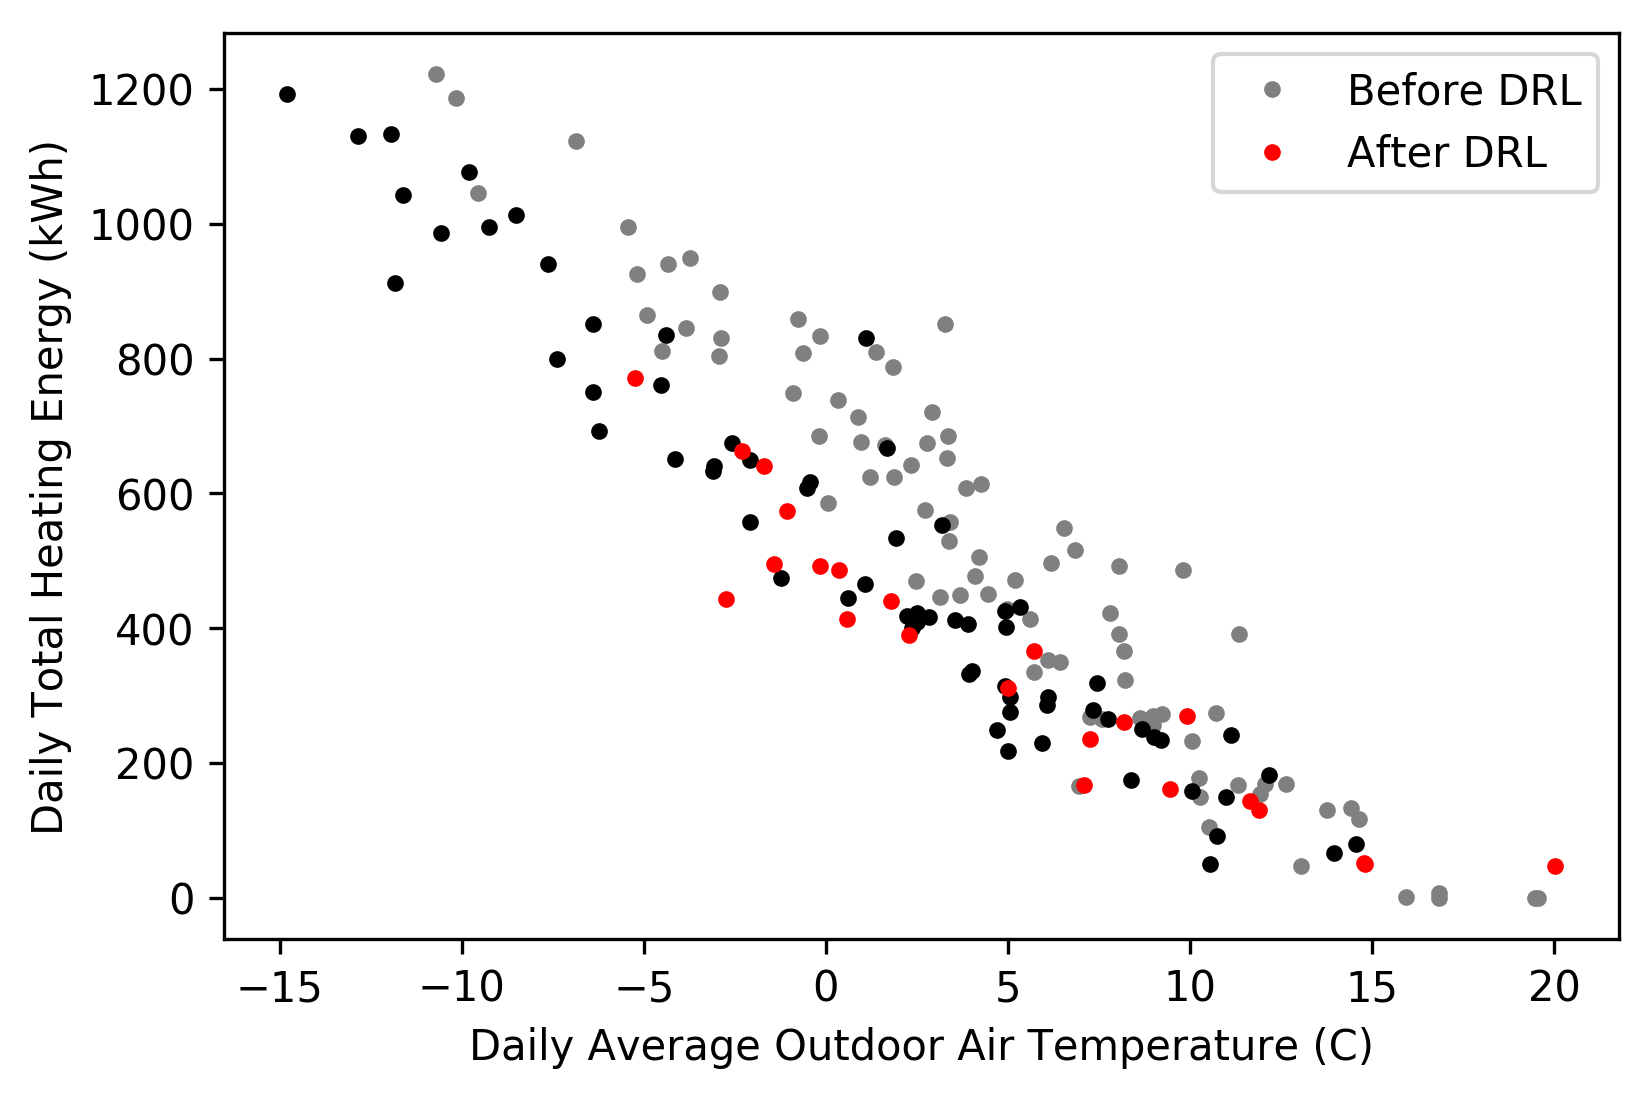

In [21]:
plt.plot(base_oat_daily.as_matrix(columns = ['c']), base_energy_daily.as_matrix(columns = ['kwh']), '.', color = 'gray', label='Before DRL')
plt.plot(base_oat_daily_17.as_matrix(columns = ['c']), base_energy_daily_17.as_matrix(columns = ['kwh']), '.', color = 'black')
plt.plot(rl_oat_daily.as_matrix(columns = ['c']), rl_energy_daily.as_matrix(columns = ['kwh']), '.', color = 'red', label='After DRL')
plt.plot(9.45, 162, '.', color = 'red')
plt.plot(1.78, 441, '.', color = 'red')
plt.plot(0.57, 414, '.', color = 'red')
plt.plot(2.27, 390, '.', color = 'red')
plt.plot(-1.42, 496, '.', color = 'red')
plt.plot(-1.71, 641, '.', color = 'red')
plt.xlabel('Daily Average Outdoor Air Temperature (C)', fontsize=10)
plt.ylabel('Daily Total Heating Energy (kWh)', fontsize=10)
plt.legend(loc='upper right')

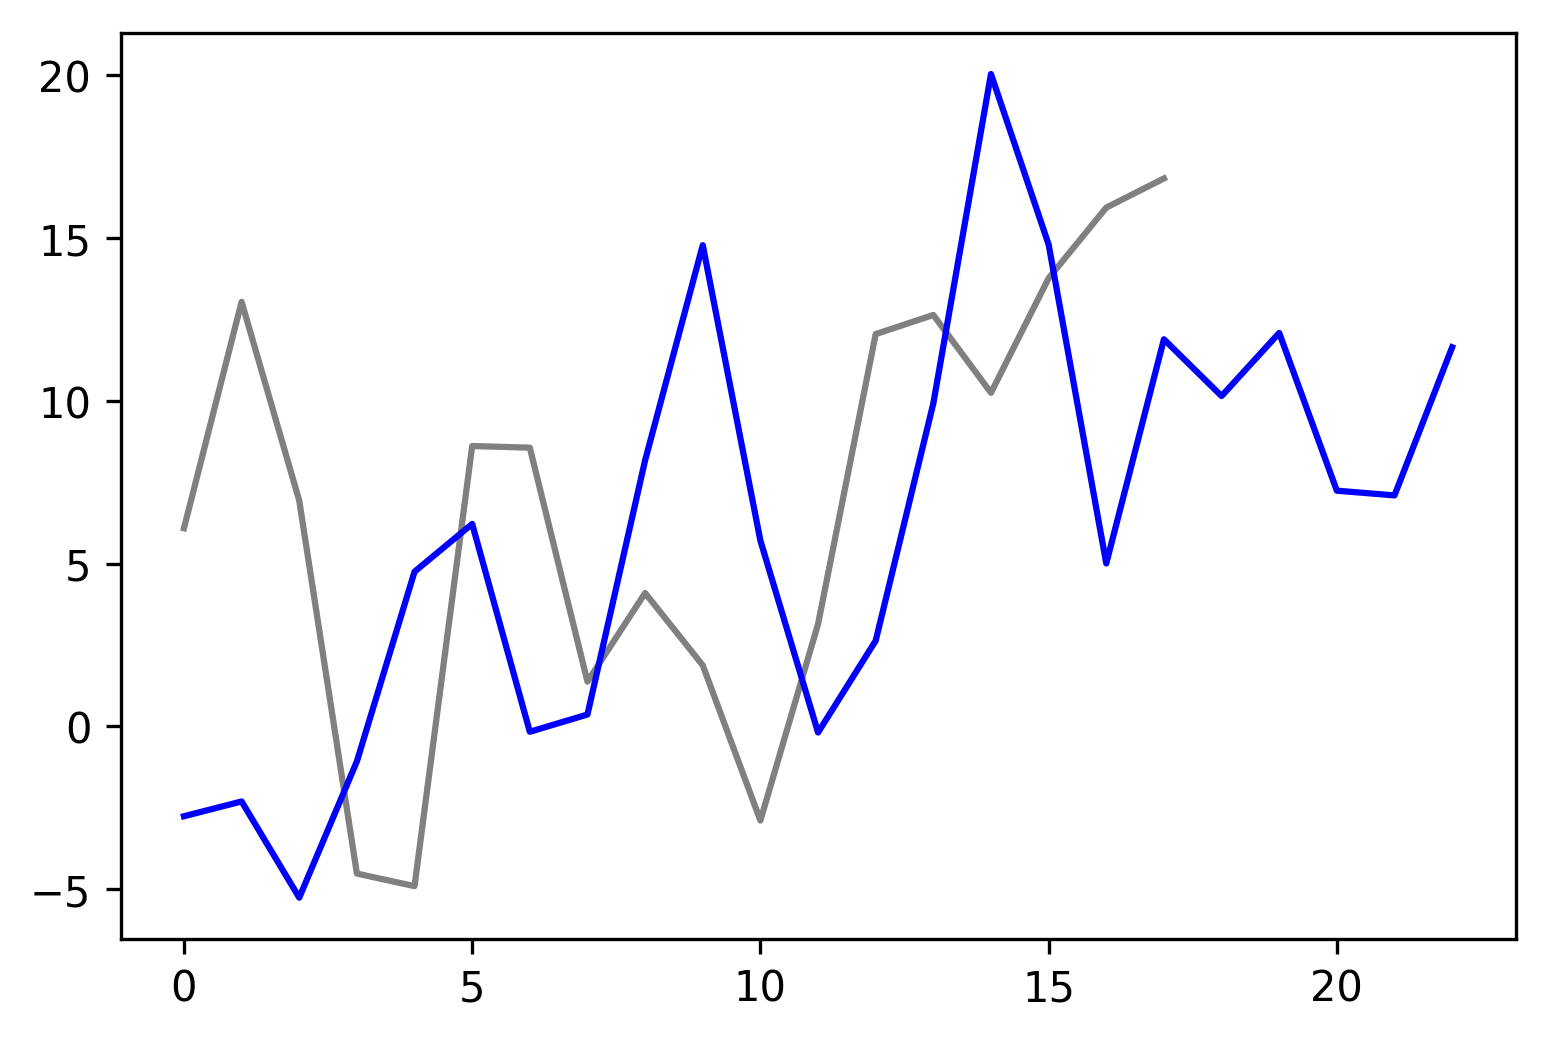

In [22]:
plt.plot(base_oat_daily_interval.as_matrix(columns = ['c']), color = 'gray')
plt.plot(rl_oat_daily_all.as_matrix(columns = ['c']), color = 'blue')

In [54]:
base_oat_month_mean = np.mean(base_oat_daily_interval.as_matrix(columns = ['c']))
rl_oat_month_mean = np.mean(rl_oat_daily_all.as_matrix(columns = ['c']))

In [56]:
print (base_oat_month_mean, rl_oat_month_mean, (rl_oat_month_mean-base_oat_month_mean)/base_oat_month_mean)

6.827213918925987 5.142113870560897 -0.2468210412586836
